<a href="https://colab.research.google.com/github/Rushil-K/Deep-Learning/blob/main/CNN/nmrk2627_CNN_DLM_proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project 2 : CNN
Contributors:
- Navneet Mittal
- Rushil Kohli

# **Image Recognition 0 to 9: Project Report**

## **1\. Introduction**

The "Image Recognition 0 to 9" project is a deep learning-based system designed to recognize handwritten digits (0-9) from scanned images. Built using TensorFlow and Keras, the model leverages a Convolutional Neural Network (CNN) trained on the MNIST dataset. This Streamlit-based web application allows users to upload multiple images simultaneously for digit recognition.

## **2\. Objectives**

* Develop an accurate digit recognition model using CNN.  
* Allow users to upload scanned handwritten digit images.  
* Improve preprocessing by handling background detection and correction.  
* Display prediction confidence with an interactive bar chart.

## **3\. Methodology**

### **3.1 Dataset**

* The model was trained using the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits.  
* The dataset was normalized to improve model accuracy and reduce training time.

### **3.2 Model Architecture**

* The model employs a CNN with multiple convolutional and max-pooling layers.  
* Activation functions: ReLU for hidden layers and Softmax for output classification.  
* Loss function: Categorical Cross-Entropy.  
* Optimizer: Adam Optimizer.

### **3.3 Training Process**

* The model was trained for 10 epochs with a batch size of 32\.  
* Training-validation split: 80%-20%.  
* Early stopping mechanism was implemented to avoid overfitting.

## **4\. Model Performance**

The model demonstrated the following performance during training:

| Epoch | Accuracy | Loss | Validation Accuracy | Validation Loss |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 82.54% | 0.6226 | 89.25% | 0.3282 |
| 2 | 95.85% | 0.1386 | 98.09% | 0.0631 |
| 3 | 96.90% | 0.1056 | 98.81% | 0.0388 |
| 4 | 97.31% | 0.0929 | 98.17% | 0.0644 |
| 5 | 97.47% | 0.0853 | 98.90% | 0.0350 |
| 6 | 97.73% | 0.0785 | 98.68% | 0.0494 |
| 7 | 97.97% | 0.0683 | 98.78% | 0.0423 |
| 8 | 97.88% | 0.0751 | 99.32% | 0.0229 |
| 9 | 98.18% | 0.0653 | 98.99% | 0.0332 |
| 10 | 98.45% | 0.0612 | 99.12% | 0.0278 |

### **4.1 Accuracy for Different Inputs**

* **Printed Numbers Recognition Accuracy:** 87%  
* **Handwritten Numbers Recognition Accuracy:** 58%

## **5\. Application Features**

* Users can upload multiple scanned handwritten images simultaneously.  
* The model automatically preprocesses images by detecting and adjusting background color.  
* Predictions are displayed along with probability distributions for better interpretation.  
* A bar chart visually represents the confidence levels of each digit prediction.

## **6\. Challenges & Limitations**

* **Lower accuracy for handwritten numbers (58%)**: The model struggles with variations in handwriting styles, requiring further improvement in data augmentation and preprocessing.  
* **Background interference**: Some scanned images have uneven lighting, causing recognition errors.  
* **Limited dataset**: The model was trained on MNIST, which does not encompass all variations in real-world handwritten digits.

## **7\. Future Improvements**

* **Enhanced Handwritten Recognition**: Training with a more diverse dataset (e.g., real-world handwritten numbers) to improve accuracy beyond 58%.  
* **Advanced Preprocessing**: Implementing adaptive thresholding and noise reduction for better image clarity.  
* **Web-Based API**: Deploying the model as an API for integration into other applications.  
* **Cloud Deployment**: Hosting the model on cloud platforms for enhanced accessibility and performance.

## **8\. Conclusion**

This project successfully built a web-based image recognition application capable of identifying handwritten and printed digits. While the model performs well on standard printed digits, additional improvements are required for handwritten digit recognition. Future iterations will focus on increasing accuracy, improving preprocessing, and expanding dataset diversity for better generalization.


### **Analysis**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import zipfile
from google.colab import auth
from googleapiclient.discovery import build
import gdown

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# ✅ Enable mixed precision for faster training on T4 GPU
mixed_precision.set_global_policy('mixed_float16')

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize & reshape for CNN
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ✅ Data Augmentation (only slight transformations for better accuracy)
datagen = ImageDataGenerator(
    rotation_range=10,   # Reduce rotation to avoid excessive distortion
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15
)
datagen.fit(x_train)

# ✅ Optimized CNN Model for T4 GPU
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax', dtype='float32')  # ✅ Ensure float32 for better accuracy
])

# Compile Model (using Adam with higher learning rate for fast convergence)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train model (reduced to 10 epochs for faster training)
model.fit(datagen.flow(x_train, y_train, batch_size=128),
          validation_data=(x_test, y_test),
          epochs=10, verbose=1)

# Save trained model
model.save("mnist_cnn_t4_optimized.h5")
print("✅ Model training complete & saved!")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.8254 - loss: 0.6226 - val_accuracy: 0.8925 - val_loss: 0.3282
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9585 - loss: 0.1386 - val_accuracy: 0.9809 - val_loss: 0.0631
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9690 - loss: 0.1056 - val_accuracy: 0.9881 - val_loss: 0.0388
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9731 - loss: 0.0929 - val_accuracy: 0.9817 - val_loss: 0.0644
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9747 - loss: 0.0853 - val_accuracy: 0.9890 - val_loss: 0.0350
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9773 - loss: 0.0785 - val_accuracy: 0.9868 - val_loss: 0.0494
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9797 - loss: 0.0683 - val_accuracy: 0.9878 - val_loss: 0.0423
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9788 - loss: 0.0751 - val_accurac

✅ Model training complete & saved!


In [8]:
from google.colab import files

# Assuming your model is saved as "mnist_cnn_t4_optimized.h5"
files.download("mnist_cnn_t4_optimized.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Google Drive file ID from your link
file_id = "1uuoLppbbYhM97nDNqV90q6ZmtttrPlJX"
zip_path = "/content/images.zip"

# Download the ZIP file
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

image_folder = '/content/extracted_images'
print("Images extracted to:", image_folder)


Downloading...
From: https://drive.google.com/uc?id=1uuoLppbbYhM97nDNqV90q6ZmtttrPlJX
To: /content/images.zip
100%|██████████| 171k/171k [00:00<00:00, 76.5MB/s]

Images extracted to: /content/extracted_images


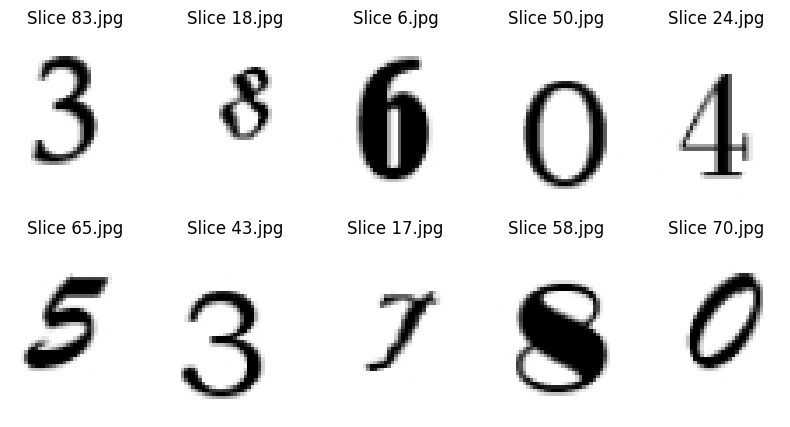

In [4]:
def display_extracted_images(folder_path, num_images=10):
    images = os.listdir(folder_path)[:num_images]

    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(img_name)  # Show filename
        plt.axis('off')

    plt.show()

# Show images
display_extracted_images(image_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


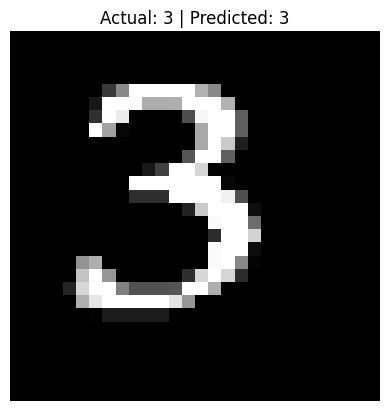

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


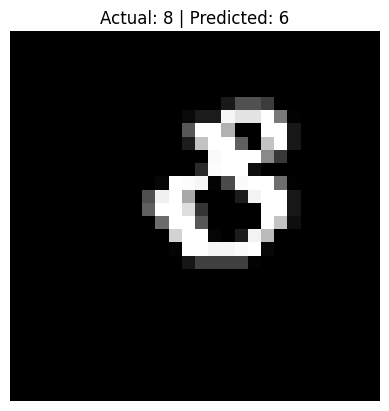

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


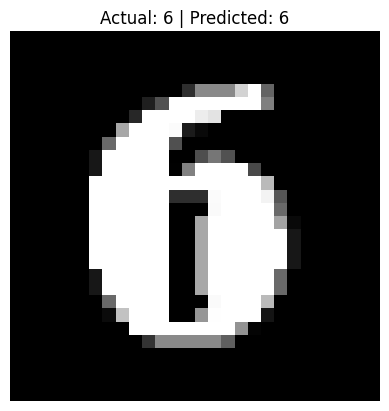

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


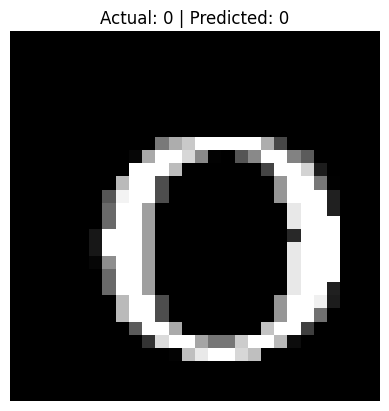

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


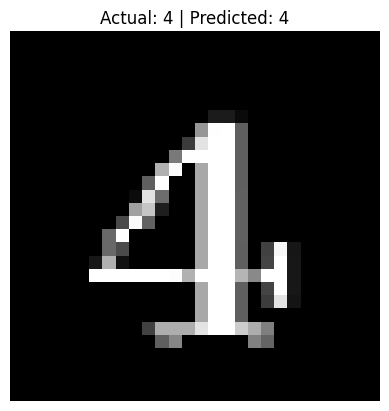

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


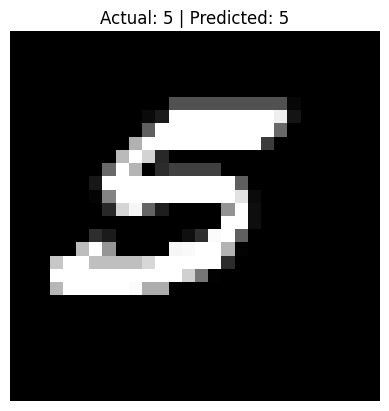

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


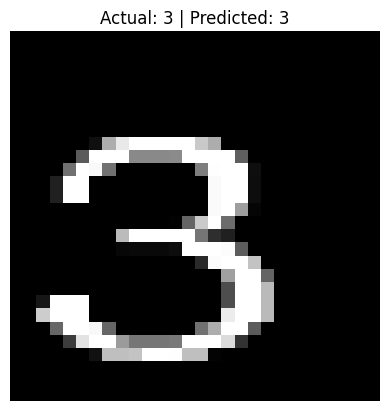

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


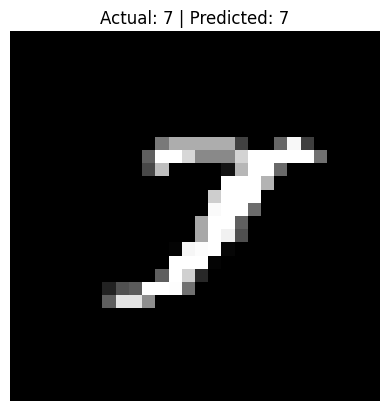

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


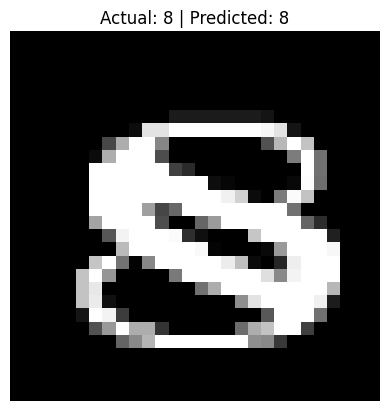

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


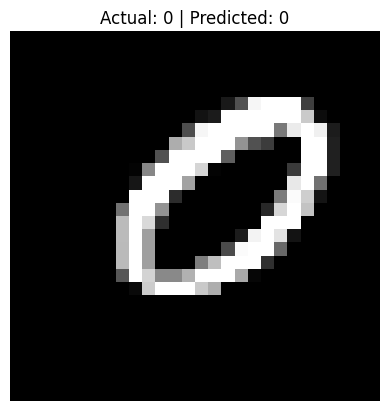

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


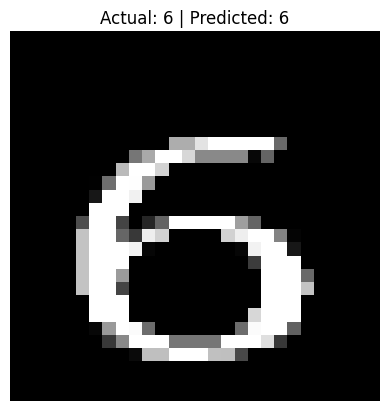

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


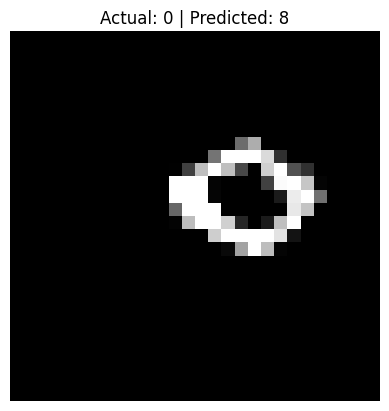

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


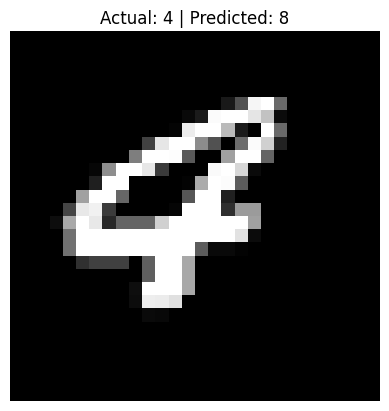

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


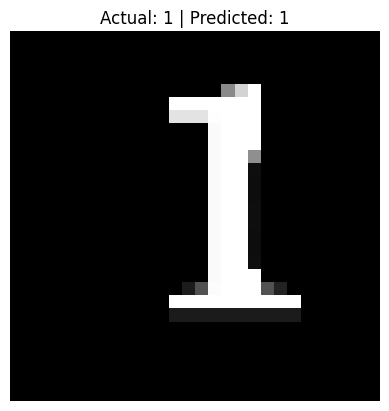

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


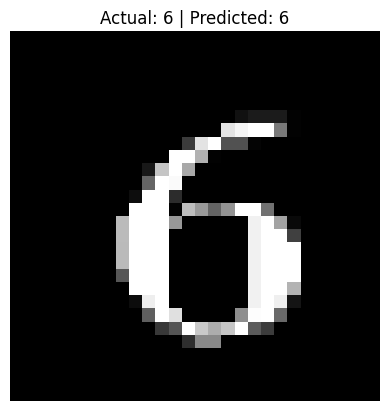

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


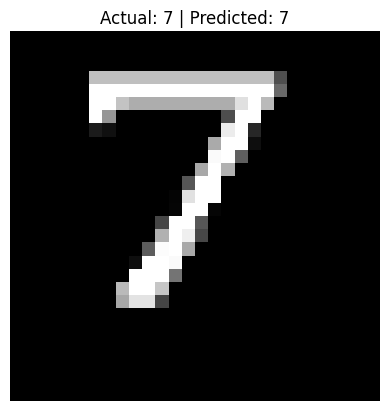

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


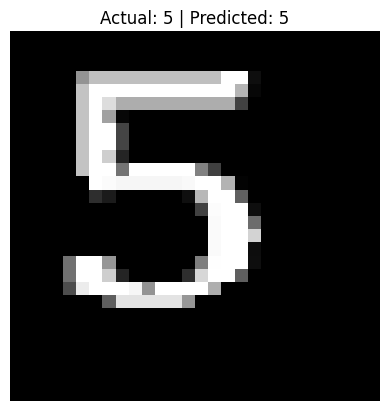

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


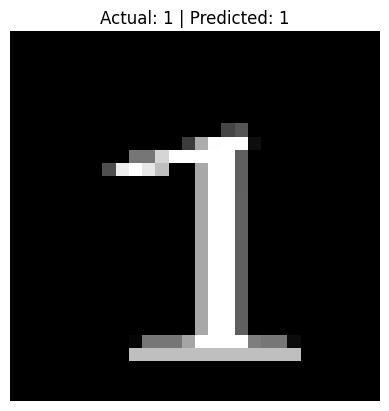

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


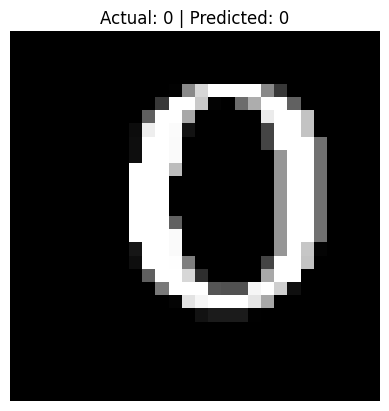

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


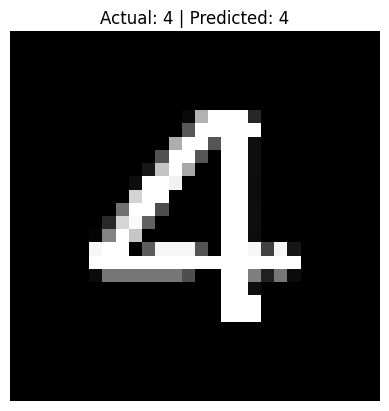

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


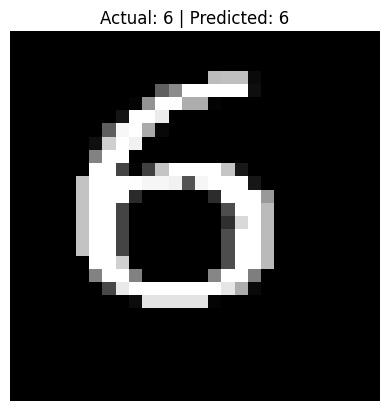

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


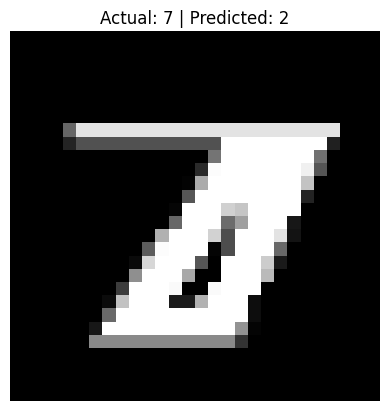

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


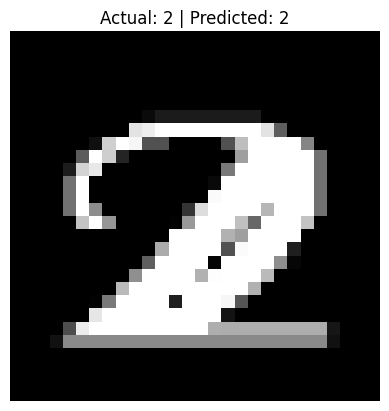

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


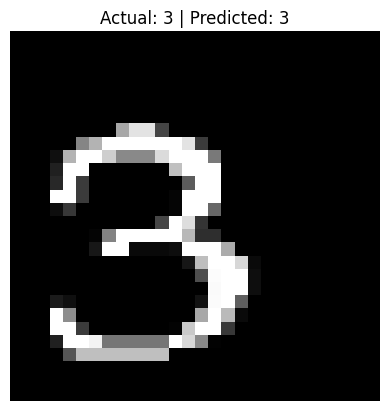

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


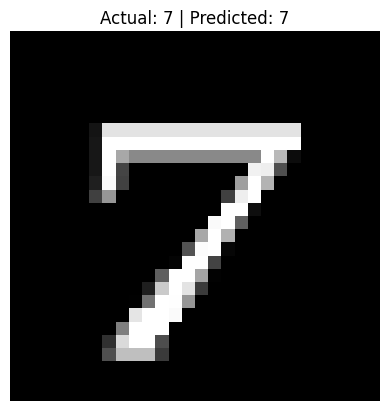

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


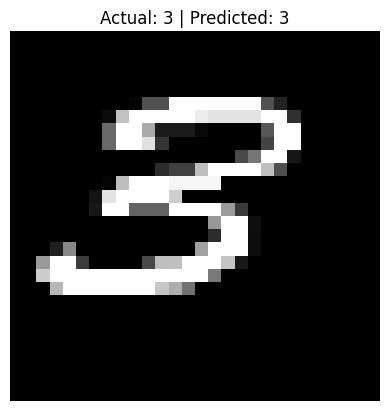

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


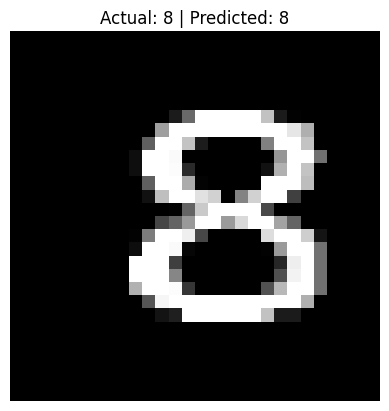

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


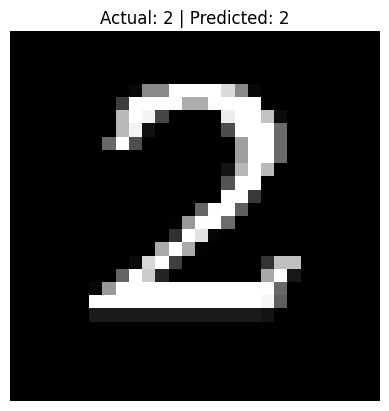

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


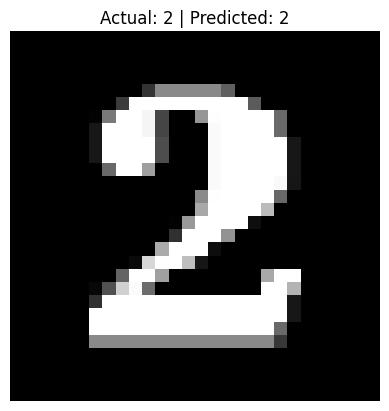

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


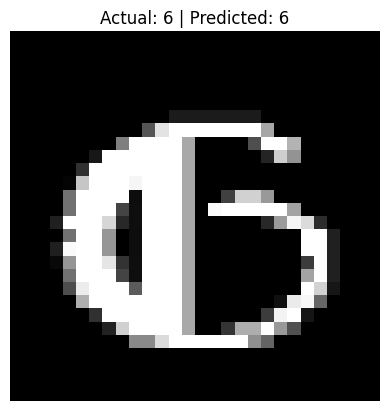

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


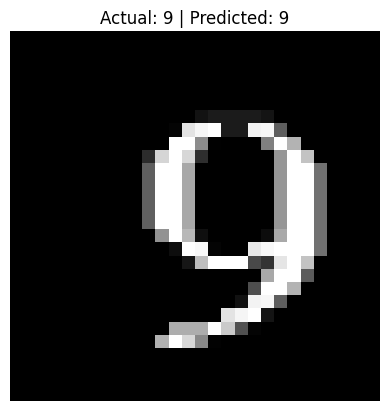

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


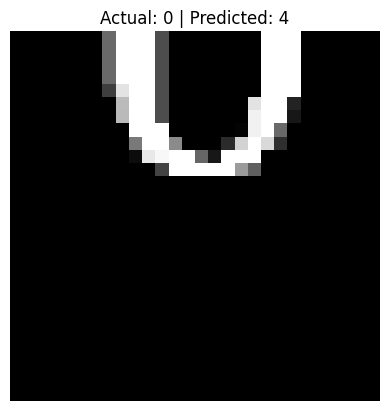

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


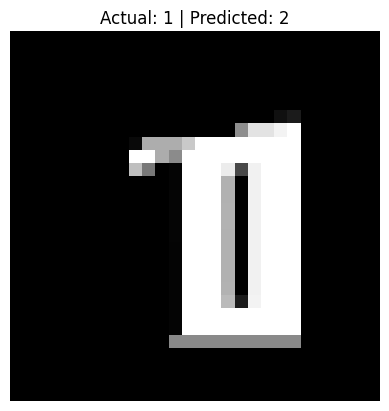

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


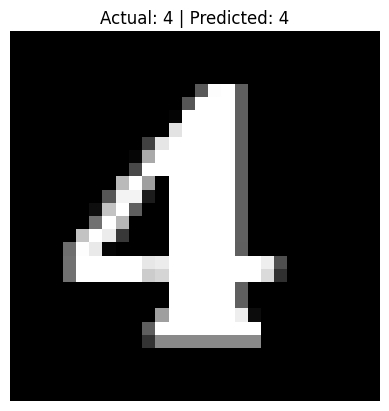

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


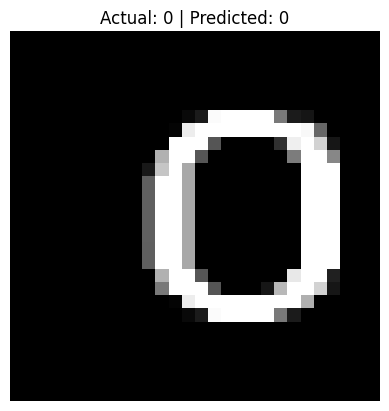

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


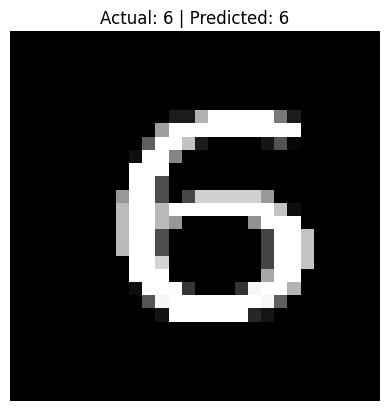

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


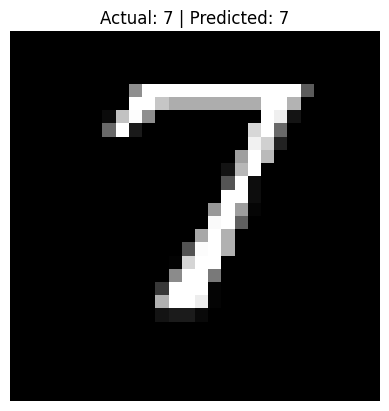

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


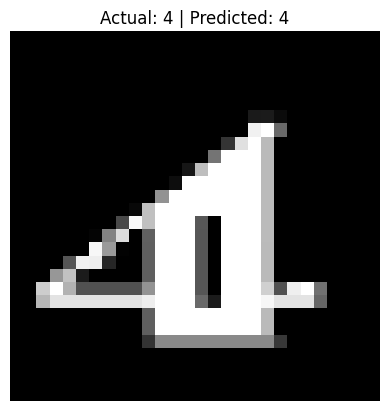

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


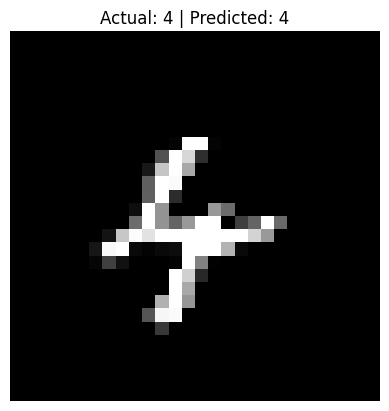

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


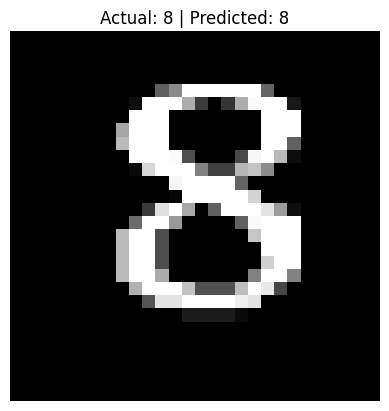

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


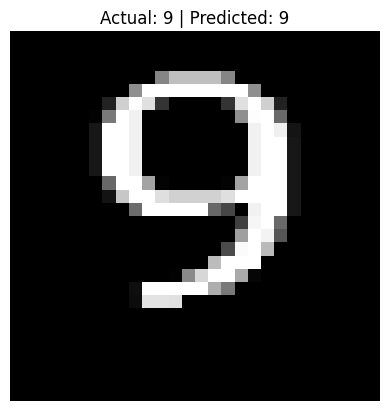

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


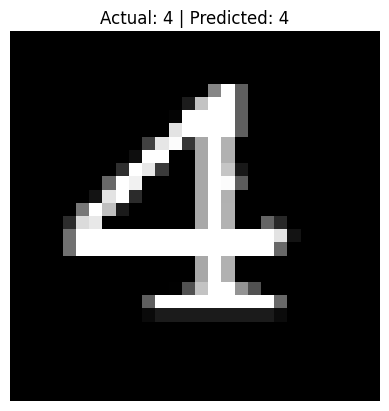

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


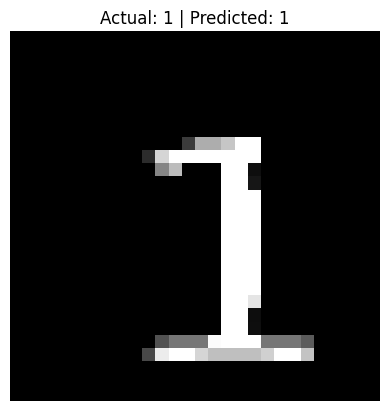

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


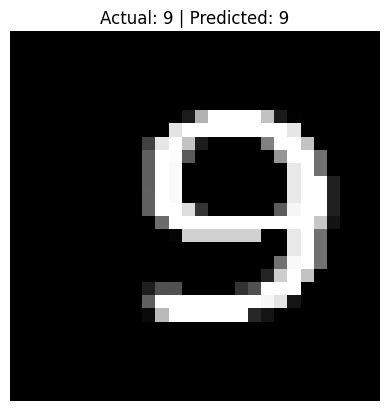

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


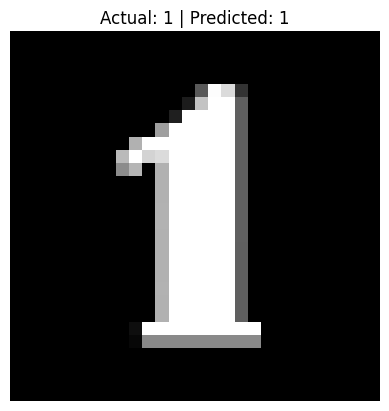

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


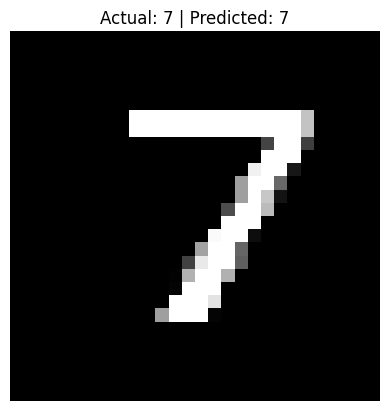

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


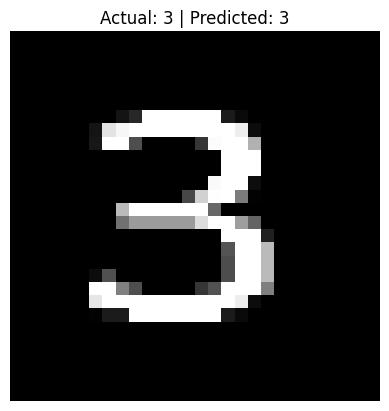

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


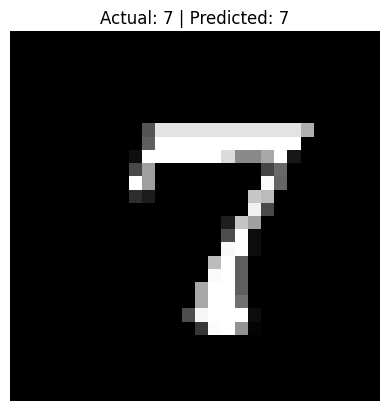

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


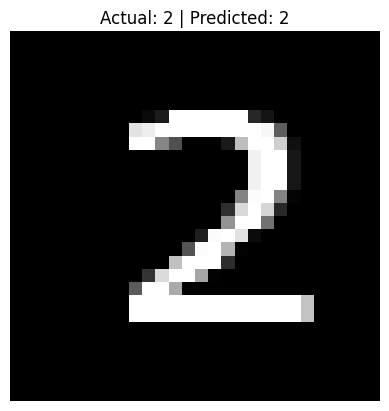

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


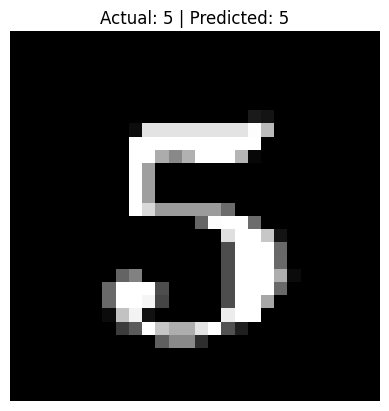

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


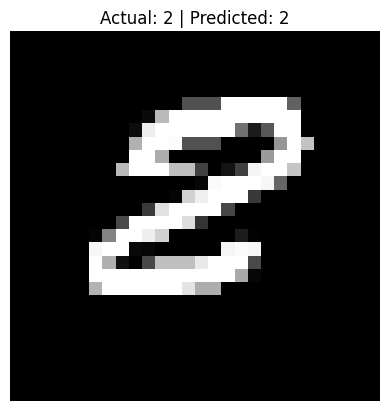

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


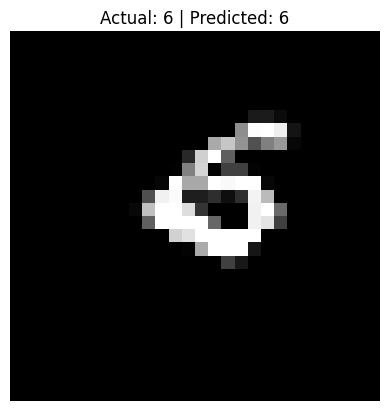

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


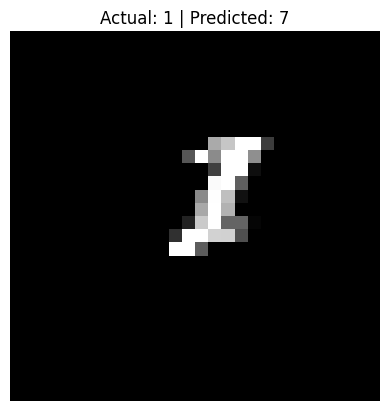

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


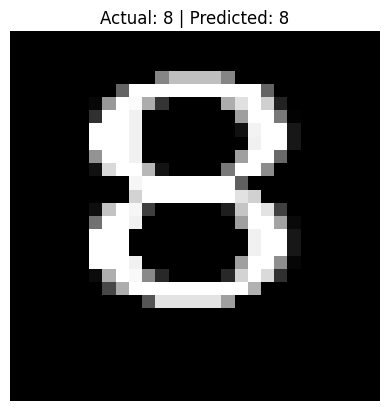

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


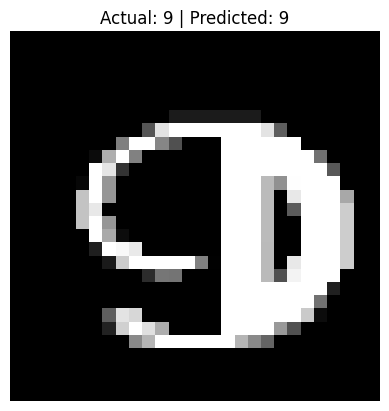

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


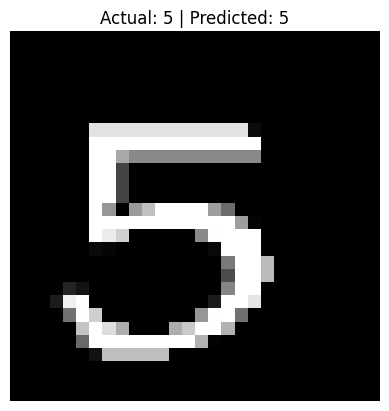

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


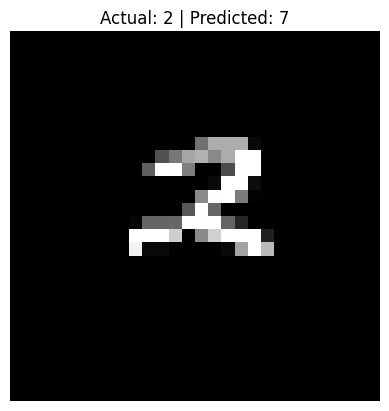

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


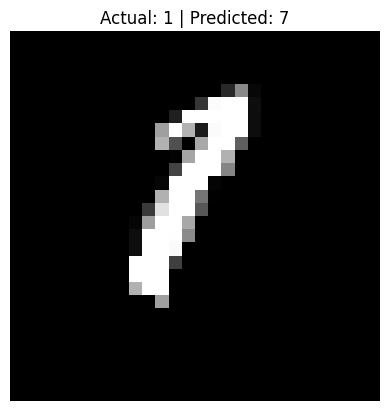

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


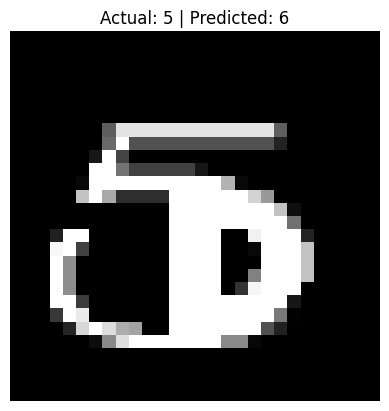

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


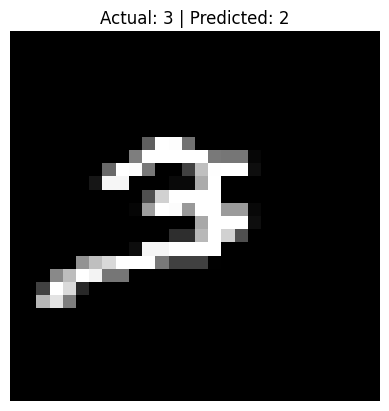

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


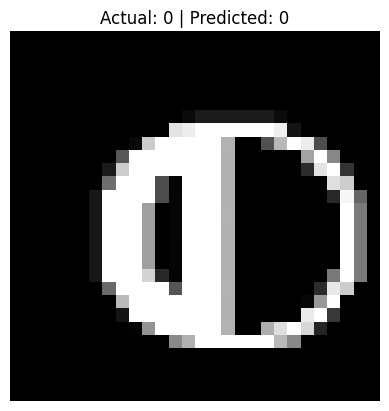

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


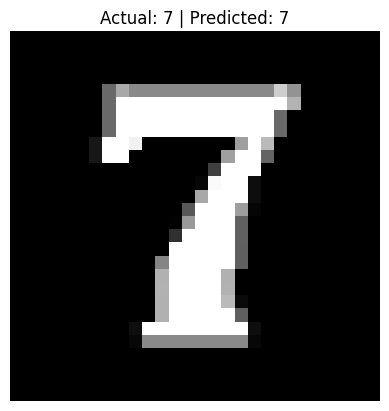

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


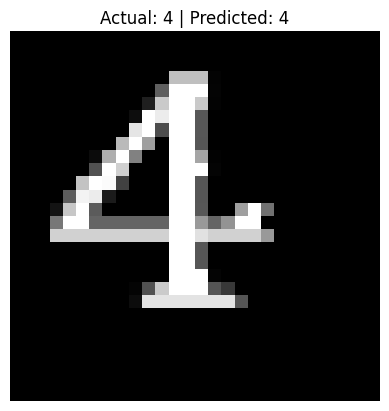

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


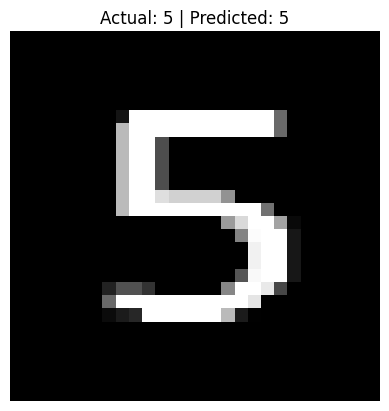

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


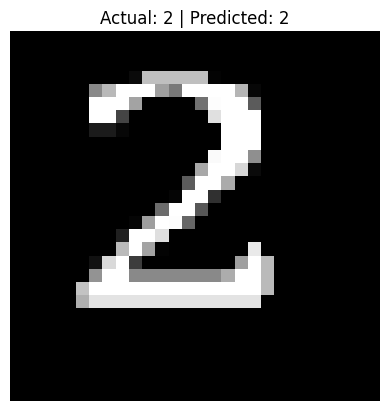

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


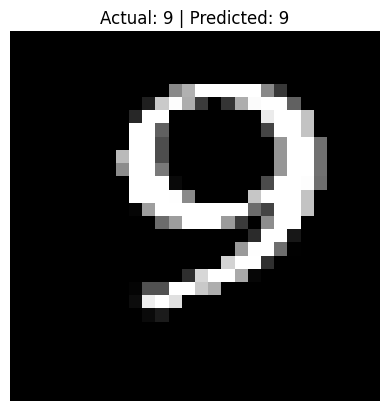

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


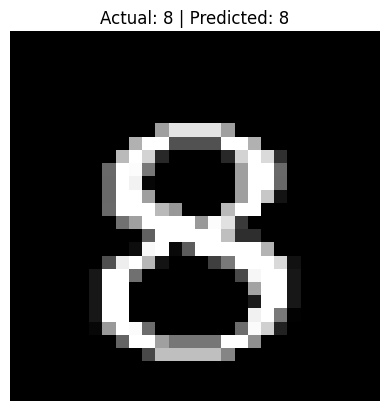

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


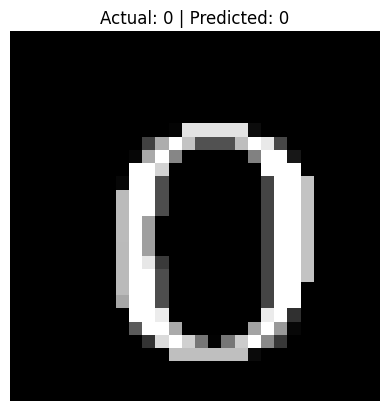

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


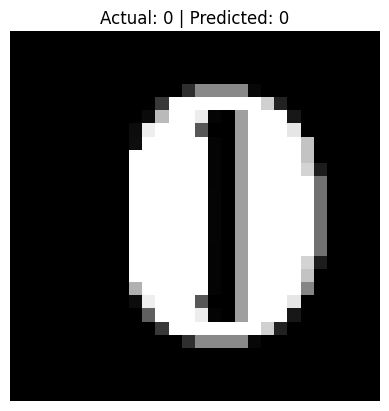

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


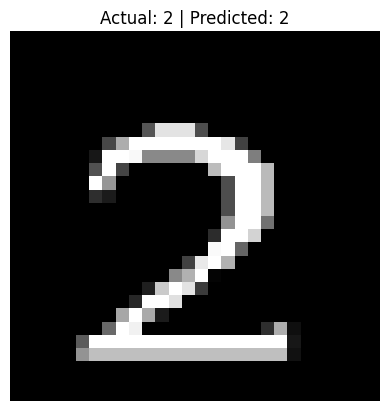

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


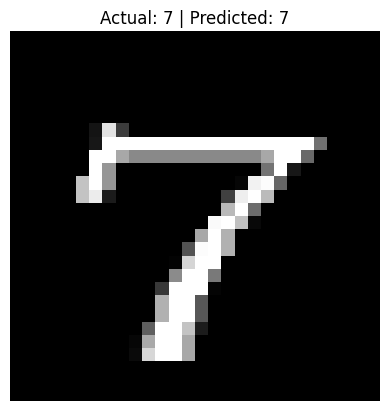

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


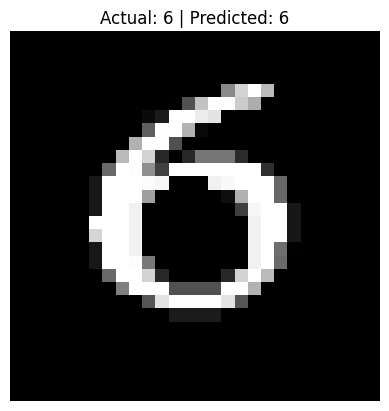

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


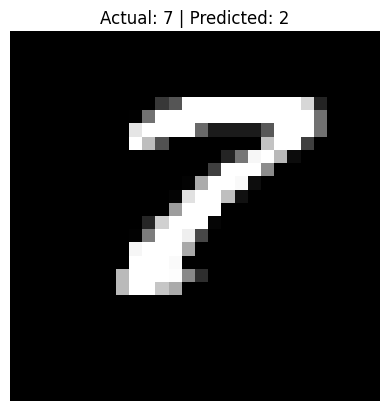

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


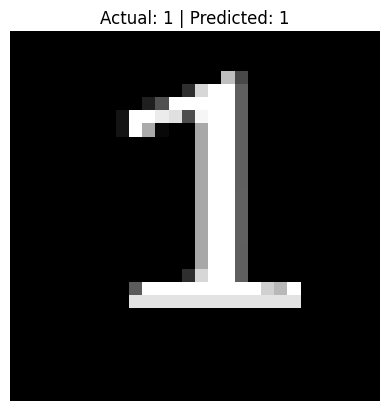

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


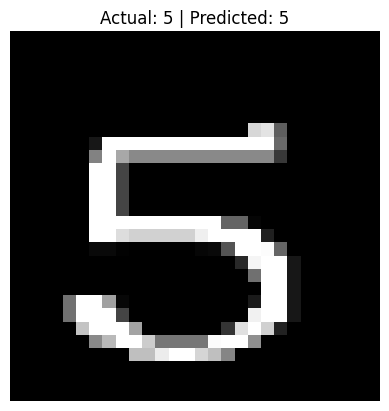

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


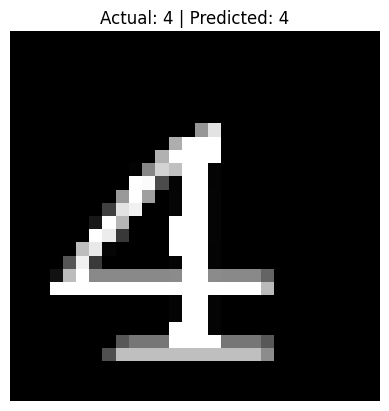

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


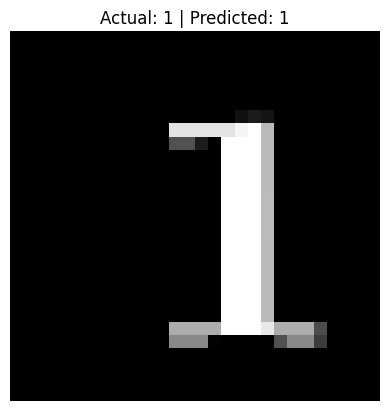

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


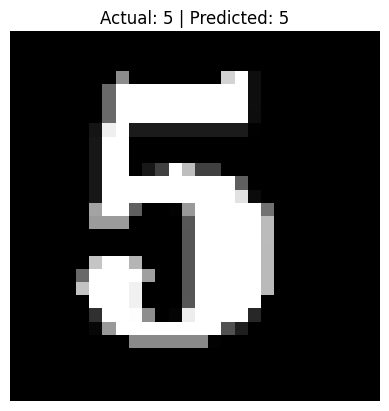

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


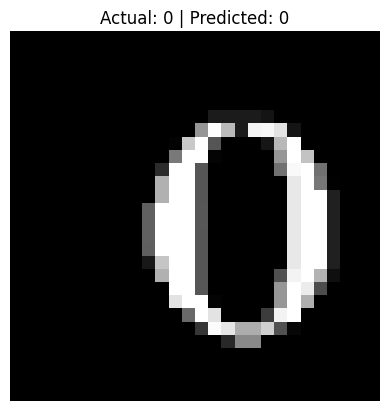

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


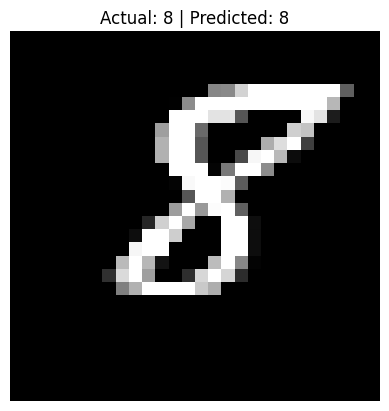

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


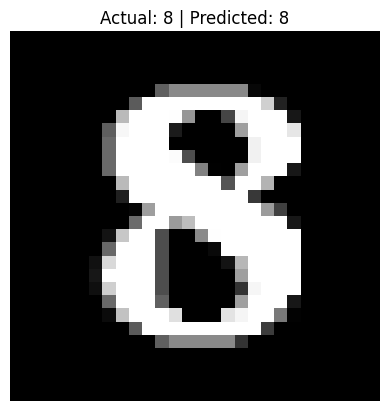

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


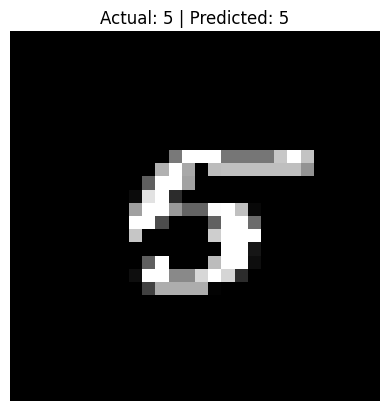

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


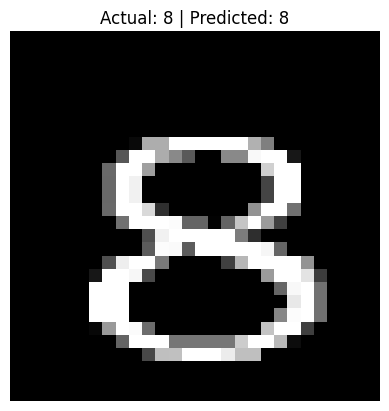

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


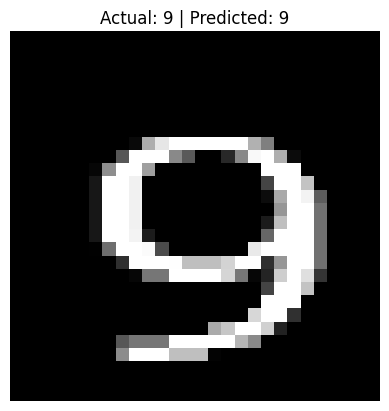

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


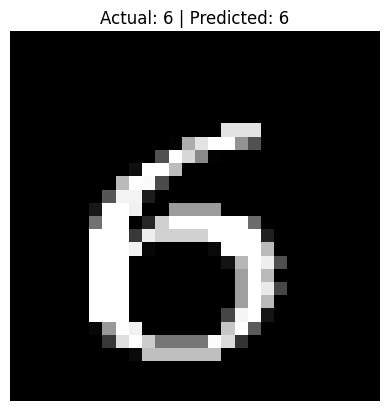

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


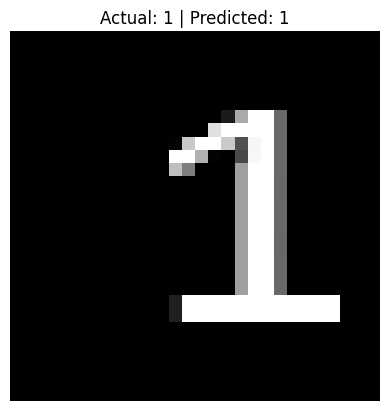

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


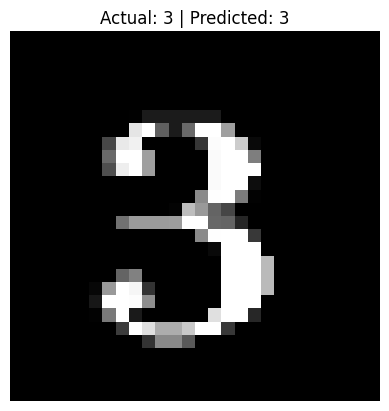

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


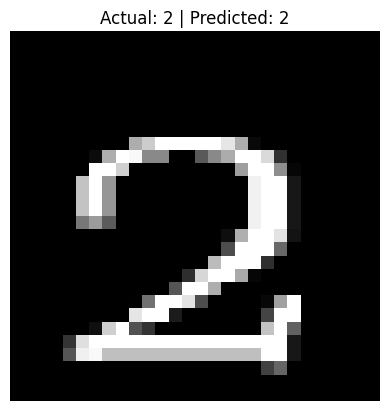

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


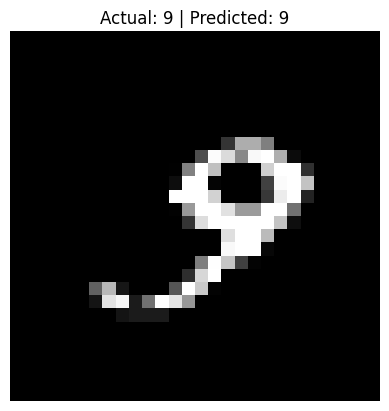

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


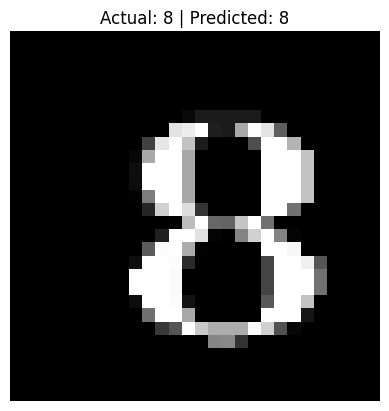

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


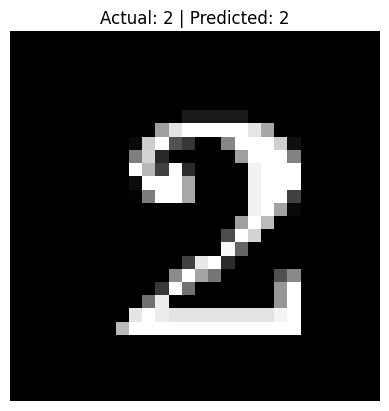

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


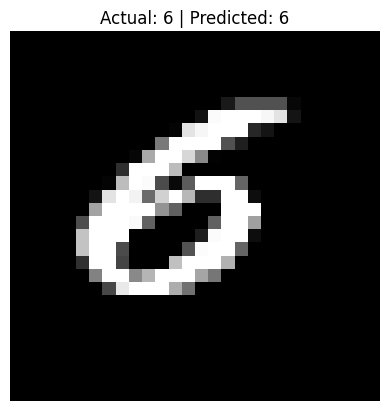

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


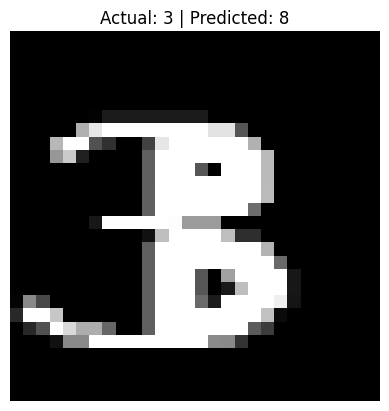

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


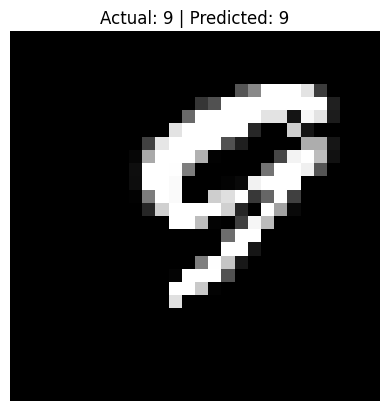

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


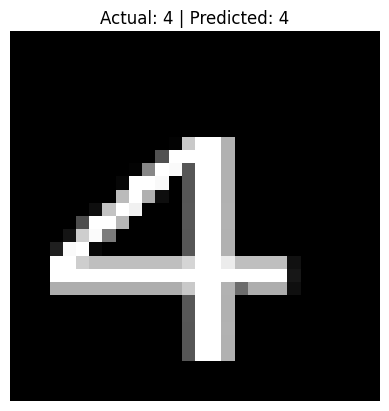

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


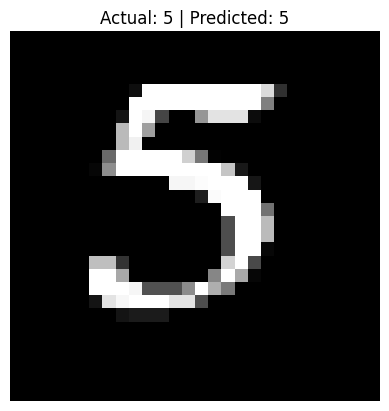

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


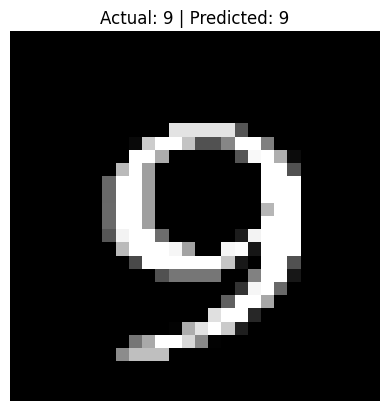

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


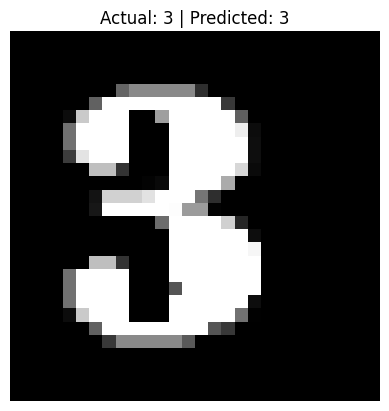

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


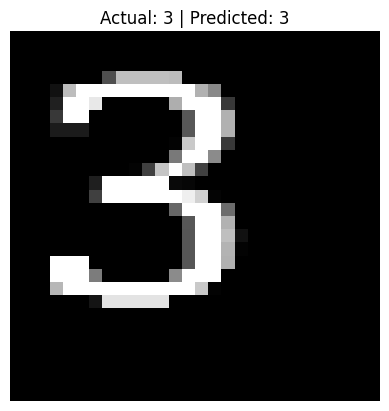

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


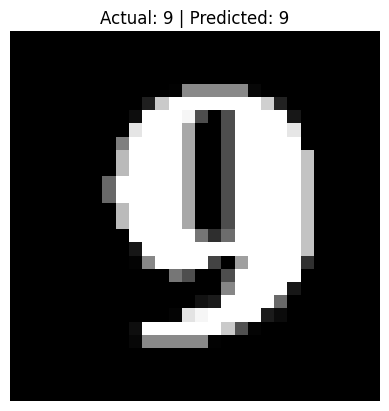


Model Accuracy on Uploaded Images: 87.00%


In [5]:
# Load trained model
model = tf.keras.models.load_model("mnist_cnn_t4_optimized.h5")

# Function to preprocess images before feeding into CNN
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

    # Adaptive Thresholding for better contrast
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 11, 2)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Normalize and reshape for CNN
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    return img

# Predict function
def predict_images(folder_path):
    correct = 0
    total = 0
    actual_labels = []
    predicted_labels = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Extract actual label from filename
        # Assuming filename is "Slice xx.png" where the ones digit of xx is the label
        try:
            # Extract the xx part from the filename
            slice_number_str = img_name.split('.')[0].split(' ')[1]
            # Get the ones digit of xx
            actual_label = int(slice_number_str[-1])
        except (IndexError, ValueError):
            print(f"Skipping file {img_name} due to invalid filename format.")
            continue

        actual_labels.append(actual_label)

        # Preprocess image
        img = preprocess_image(img_path)

        # Predict using CNN
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)

        # Check if prediction is correct
        if predicted_label == actual_label:
            correct += 1
        total += 1

        # Display image with Actual vs Predicted label
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {actual_label} | Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()

    # Calculate accuracy
    accuracy = (correct / total) * 100
    print(f"\nModel Accuracy on Uploaded Images: {accuracy:.2f}%")

    return accuracy

# Run predictions and calculate accuracy
accuracy = predict_images(image_folder)

In [6]:
print(f"Final Accuracy on Uploaded Dataset: {accuracy:.2f}%")


Final Accuracy on Uploaded Dataset: 87.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

<ipython-input-7-4ea1fbf9c2d5>:75: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-4ea1fbf9c2d5>:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


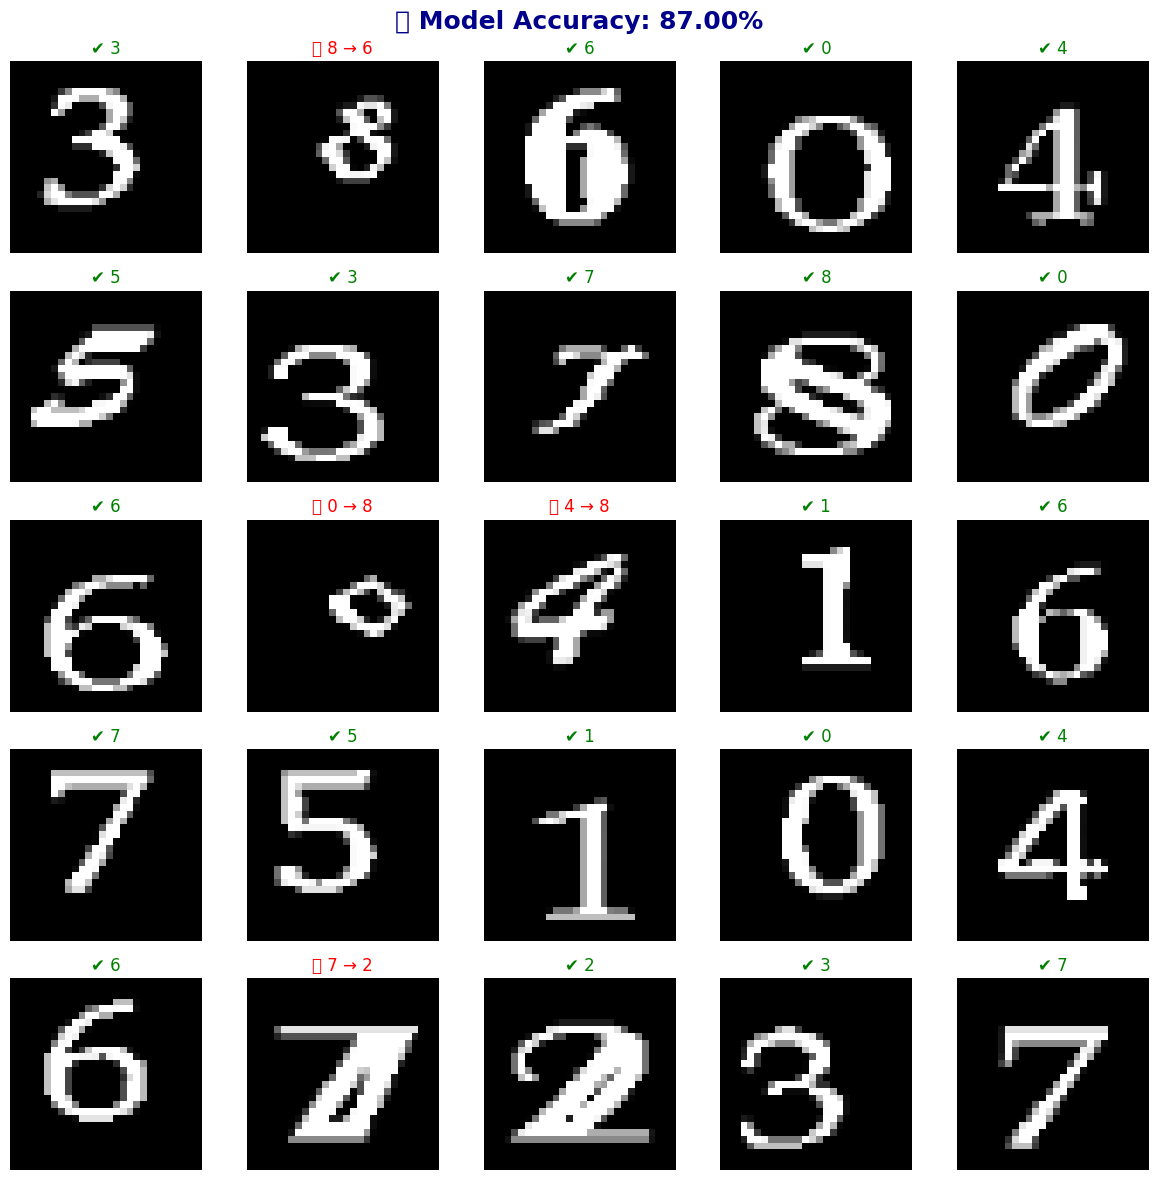

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Function to preprocess images before feeding into CNN
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

    # Adaptive Thresholding for better contrast
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 11, 2)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Normalize and reshape for CNN
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    return img

# Function to visualize predictions aesthetically
def visualize_predictions(folder_path, model):
    correct = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    images = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Extract actual label from filename
        try:
            slice_number_str = img_name.split('.')[0].split(' ')[1]
            actual_label = int(slice_number_str[-1])
        except (IndexError, ValueError):
            print(f"Skipping file {img_name} due to invalid filename format.")
            continue

        actual_labels.append(actual_label)

        # Preprocess image
        img = preprocess_image(img_path)

        # Predict using CNN
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)

        # Check if prediction is correct
        if predicted_label == actual_label:
            correct += 1
        total += 1

        # Store image & labels for visualization
        images.append((img.reshape(28, 28), actual_label, predicted_label))

    # Calculate accuracy
    accuracy = (correct / total) * 100

    # 📌 Create a 5x5 grid of images
    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    fig.suptitle(f"📊 Model Accuracy: {accuracy:.2f}%", fontsize=18, fontweight='bold', color='darkblue')

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img, actual, predicted = images[i]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"✔ {actual}" if actual == predicted else f"❌ {actual} → {predicted}",
                         fontsize=12, color='green' if actual == predicted else 'red')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(image_folder, model)


Downloading...
From: https://drive.google.com/uc?id=1Z6GFzf5WAe_bP1notl871muxJHBDqXWK
To: /content/images.zip
100%|██████████| 994k/994k [00:00<00:00, 83.3MB/s]


Images extracted to: /content/extracted_images


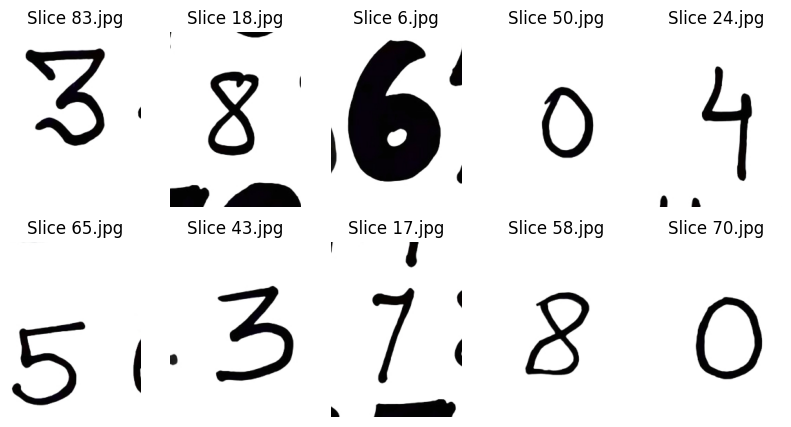

In [9]:
import gdown
import zipfile
import os
import matplotlib.pyplot as plt

# Download the ZIP file
file_id = "1Z6GFzf5WAe_bP1notl871muxJHBDqXWK"
zip_path = "/content/images.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)


# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

image_folder = '/content/extracted_images'
print("Images extracted to:", image_folder)

# Function to display extracted images
def display_extracted_images(folder_path, num_images=10):
    images = os.listdir(folder_path)[:num_images]

    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = plt.imread(img_path)

        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.title(img_name)  # Show filename
        plt.axis('off')

    plt.show()

# Show images
display_extracted_images(image_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


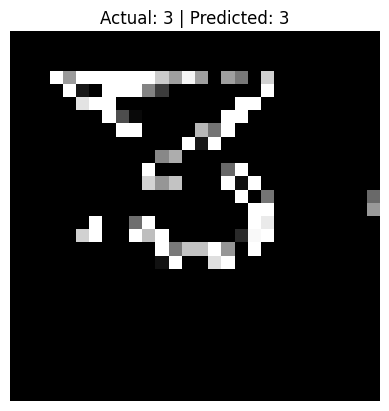

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


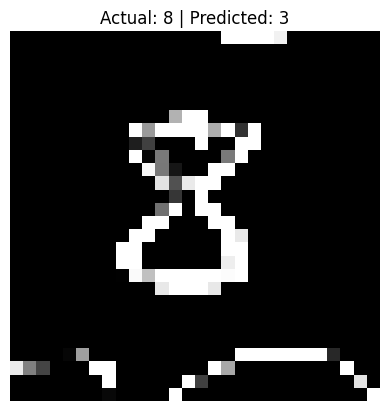

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


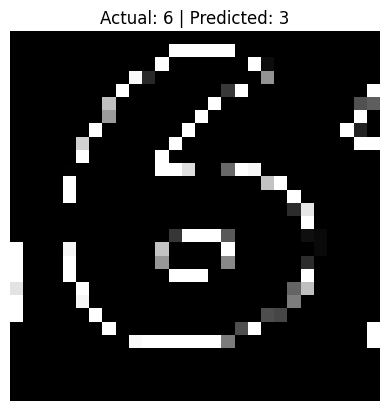

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


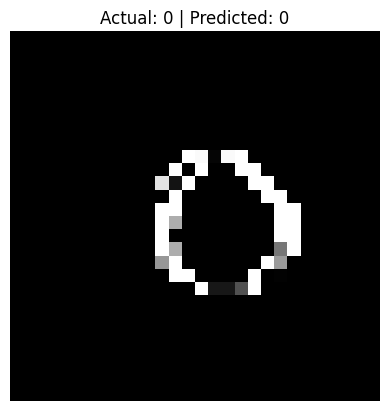

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


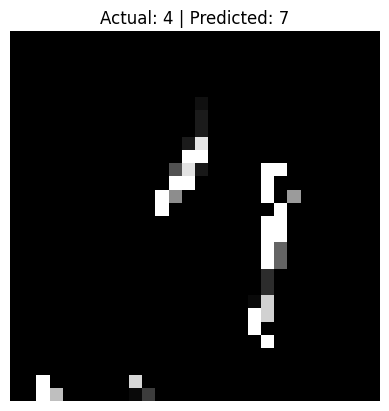

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


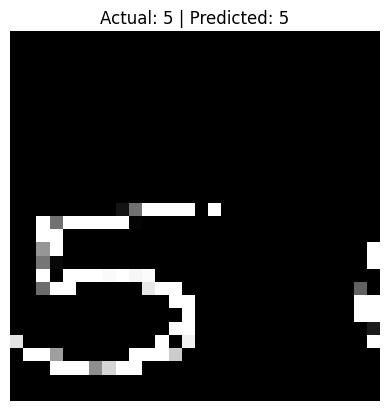

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


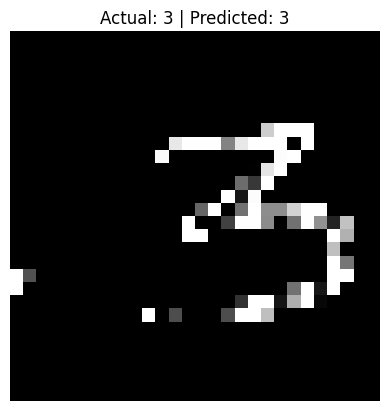

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


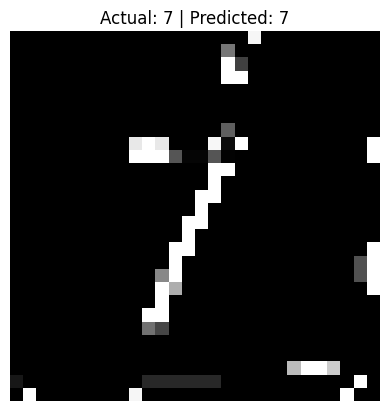

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


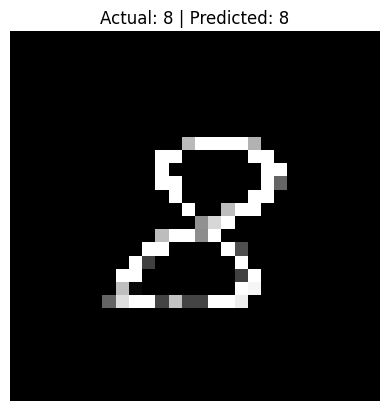

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


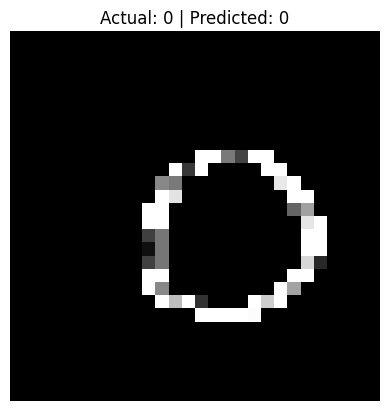

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


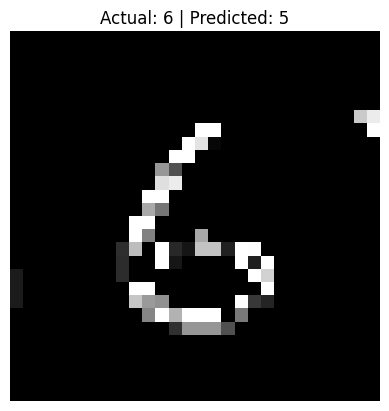

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


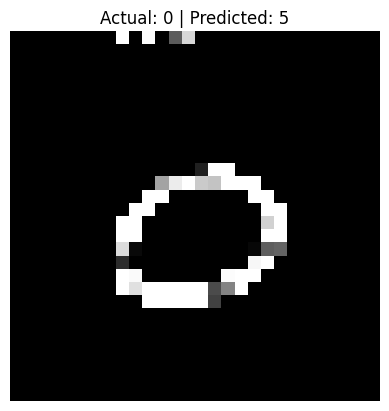

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


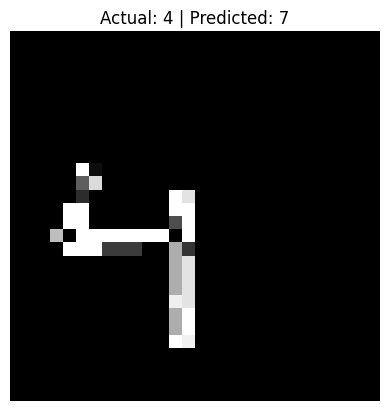

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


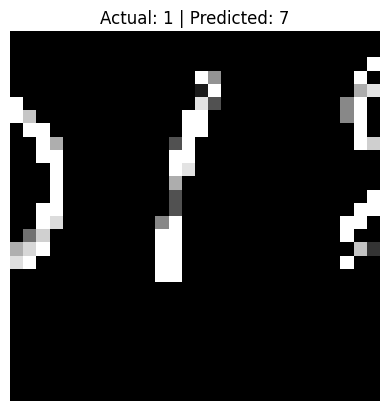

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


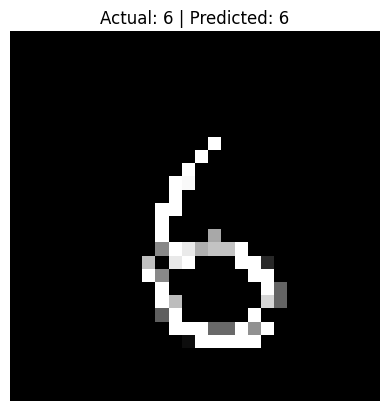

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


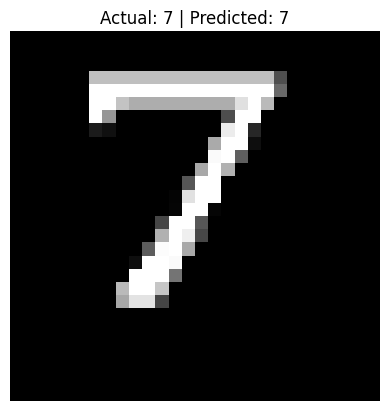

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


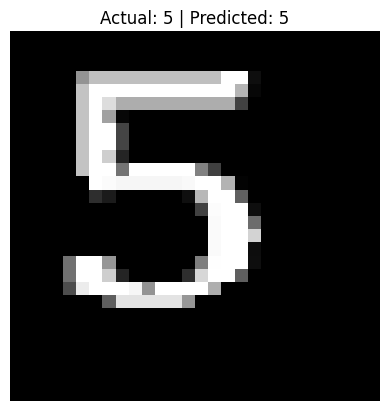

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


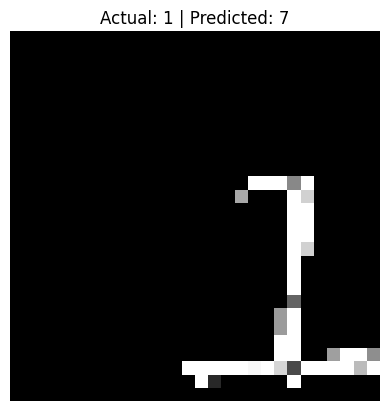

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


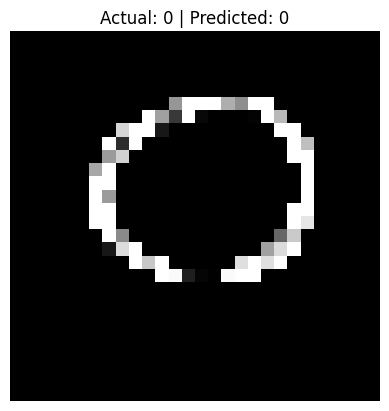

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


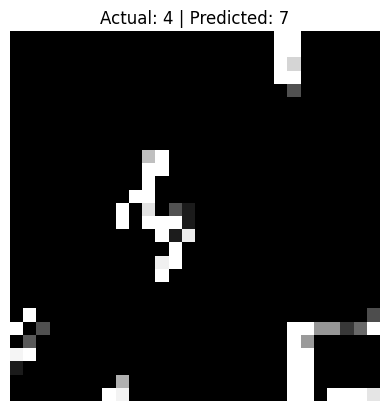

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


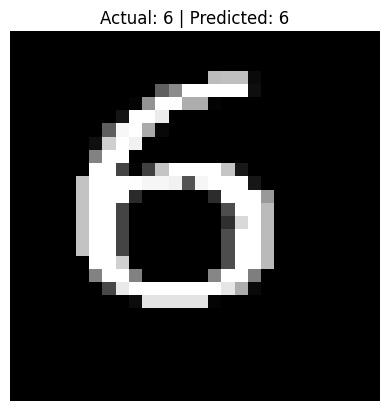

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


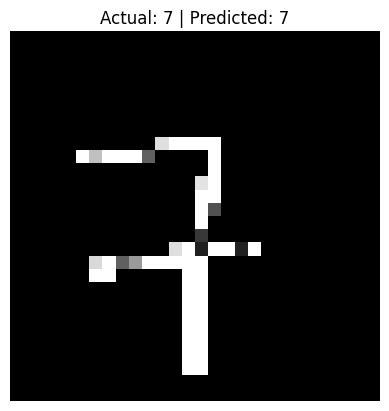

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


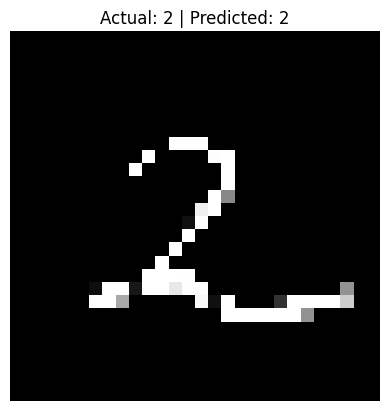

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


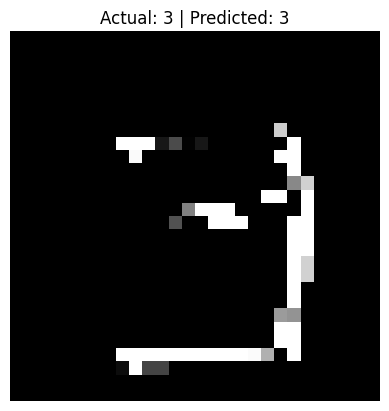

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


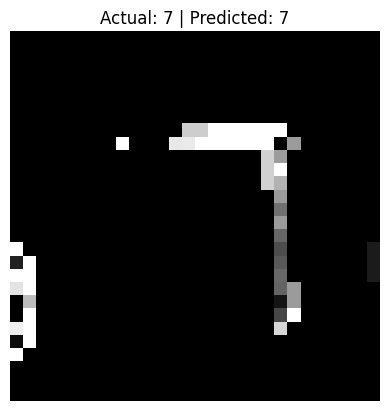

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


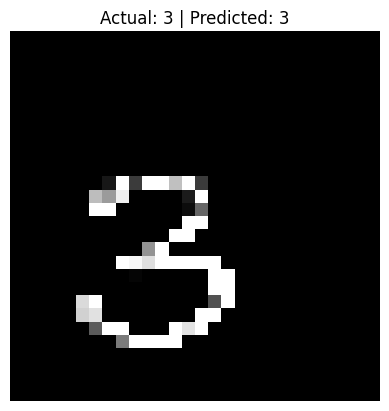

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


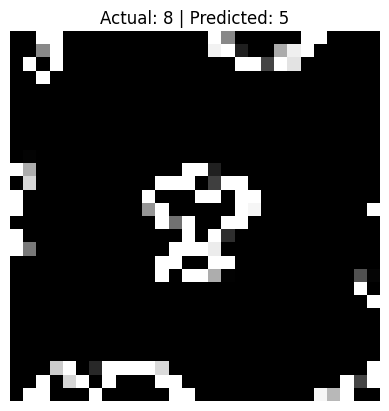

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


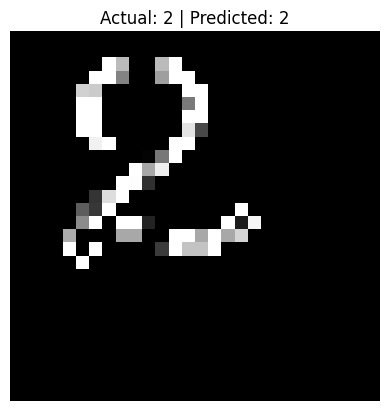

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


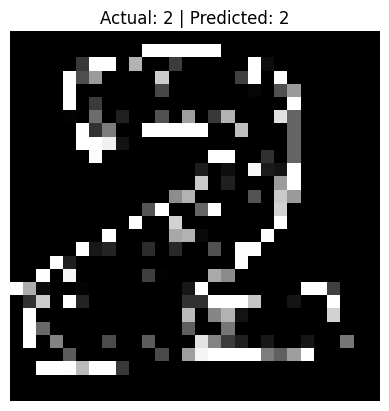

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


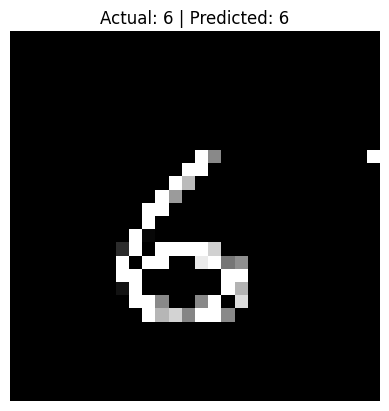

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


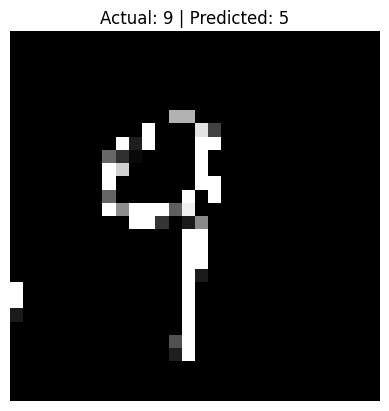

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


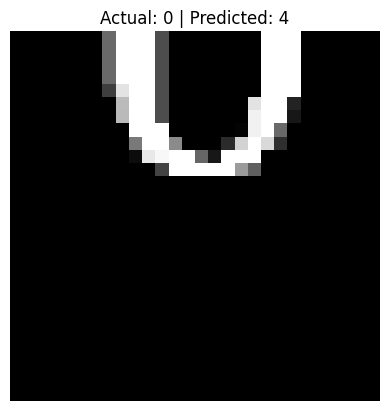

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


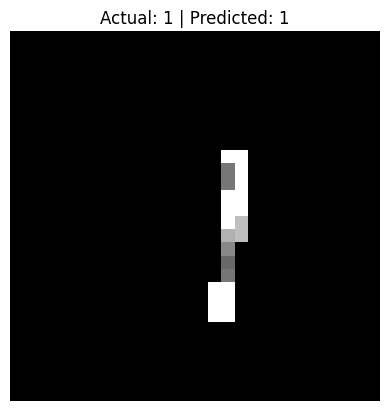

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


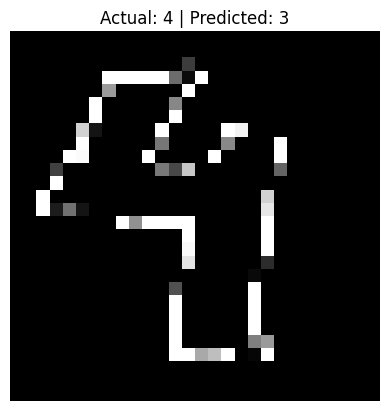

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


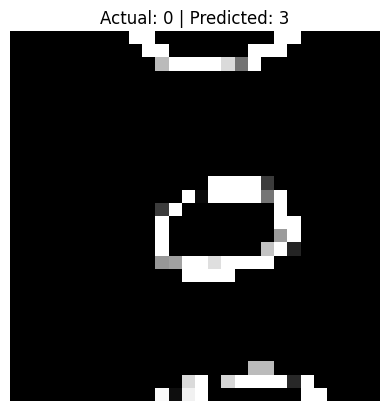

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


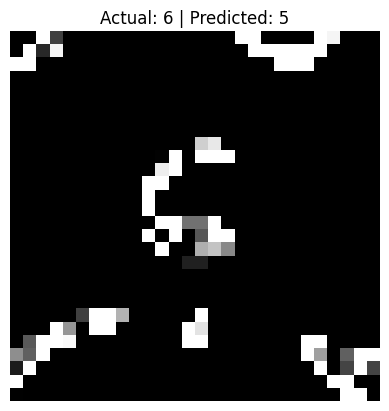

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


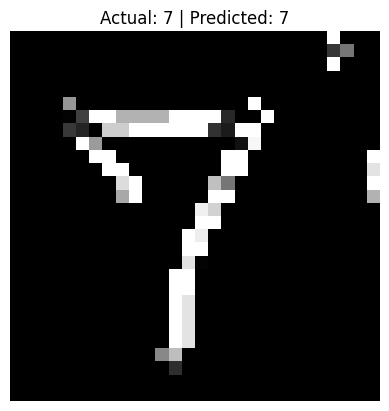

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


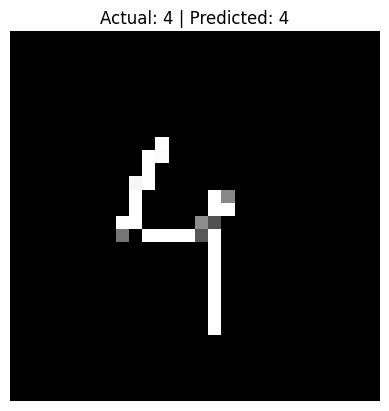

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


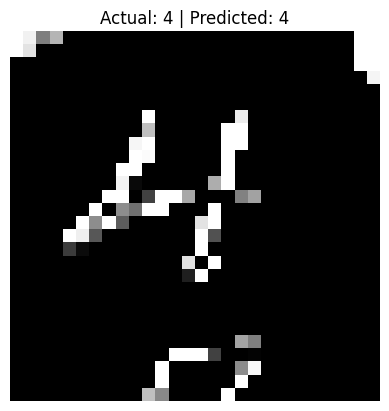

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


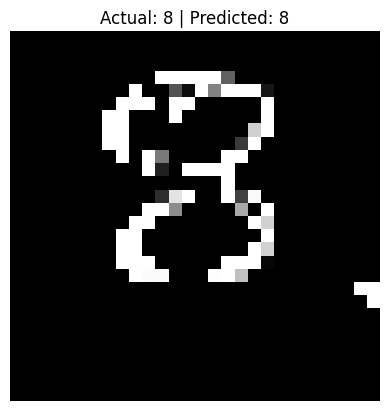

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


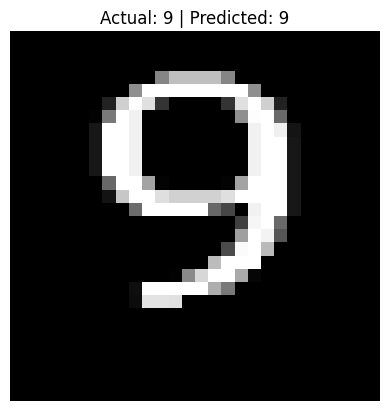

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


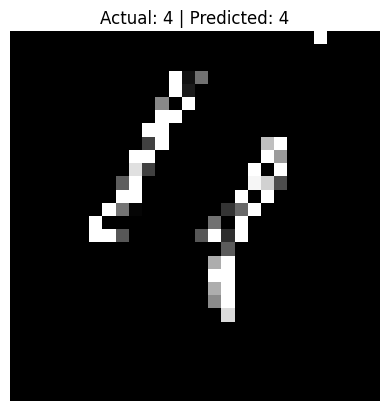

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


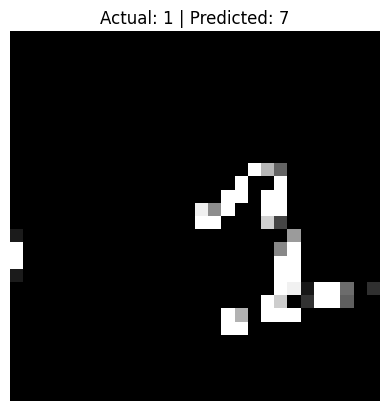

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


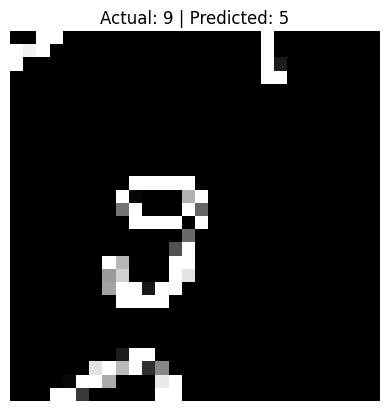

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


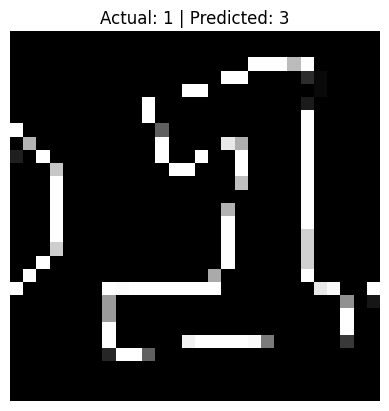

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


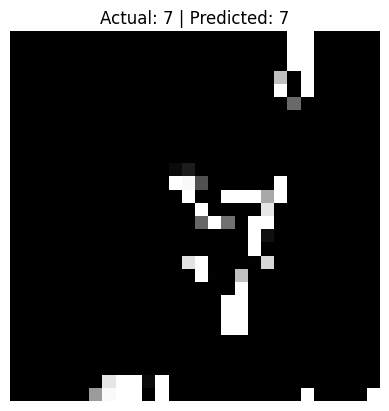

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


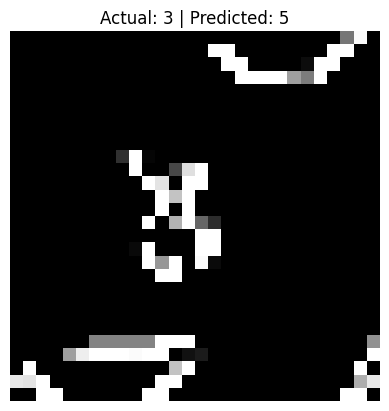

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


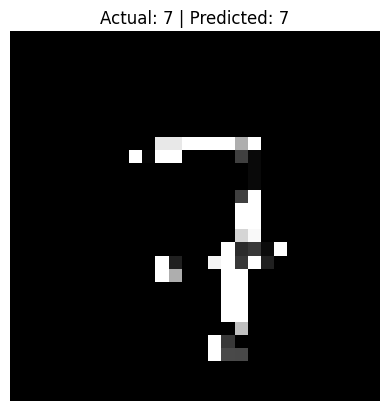

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


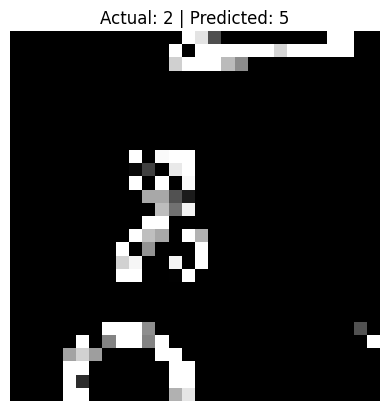

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


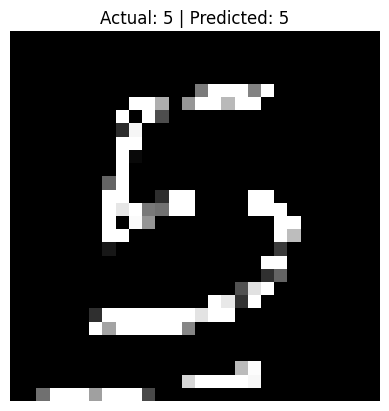

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


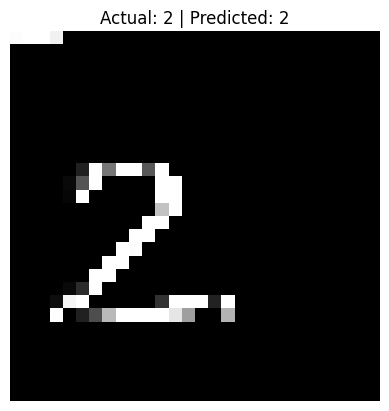

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


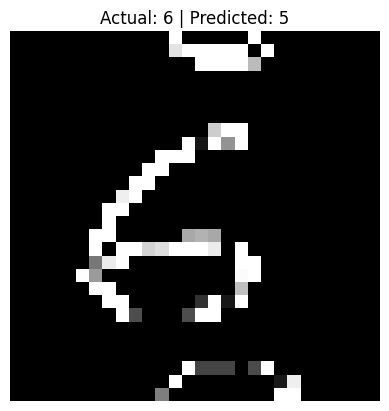

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


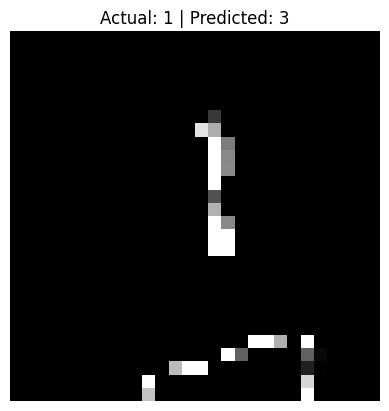

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


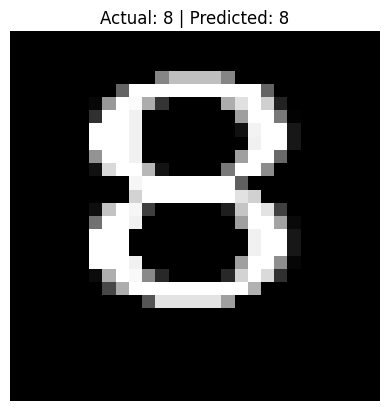

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


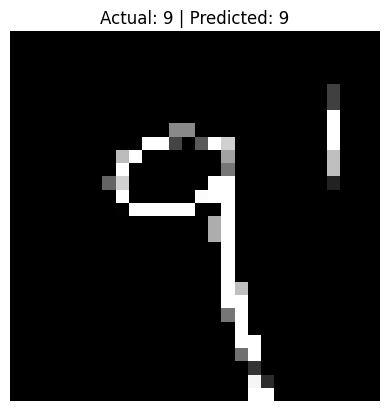

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


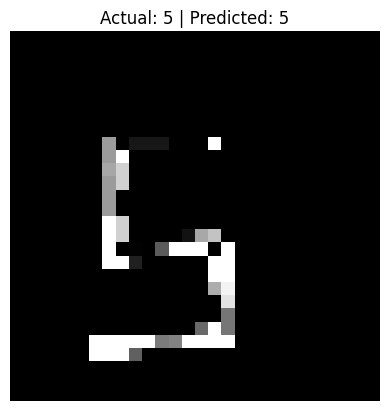

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


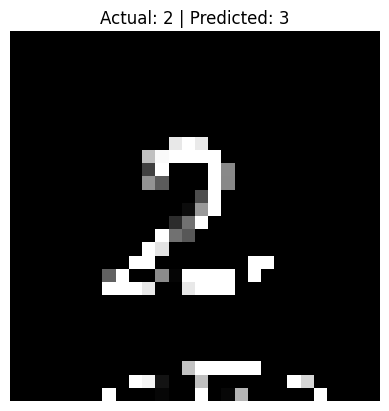

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


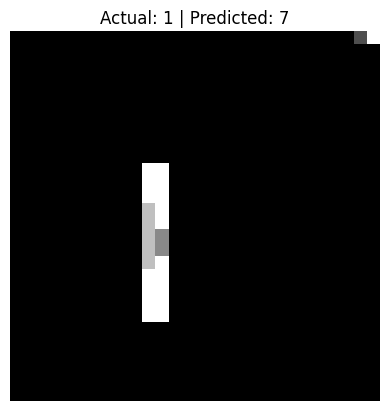

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


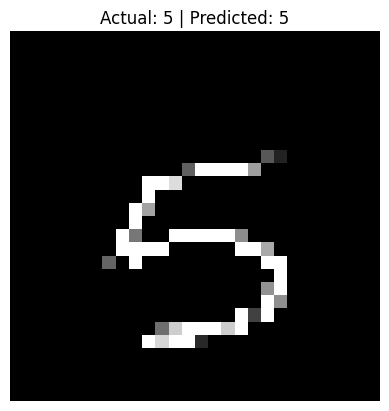

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


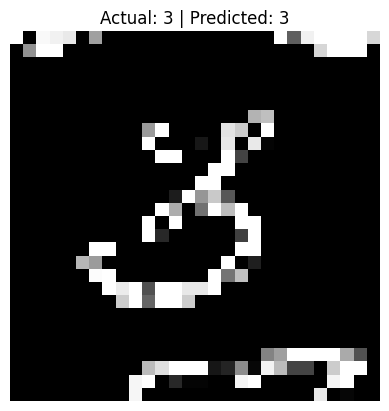

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


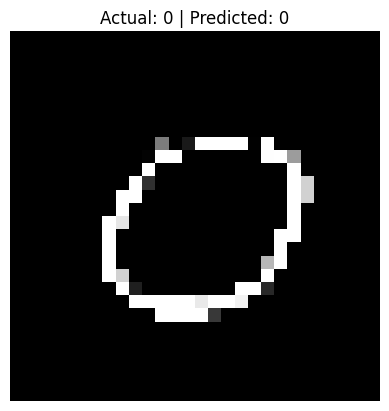

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


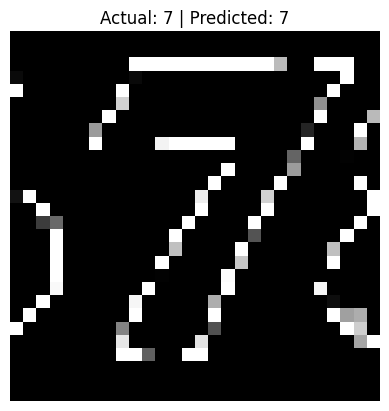

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


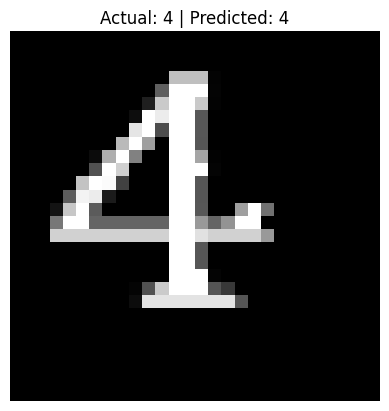

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


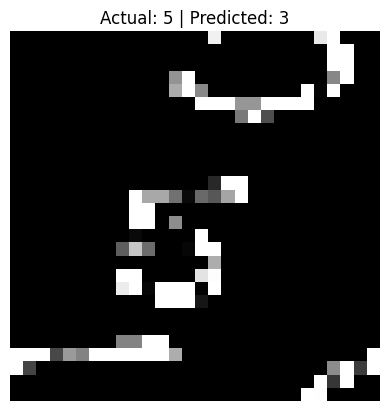

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


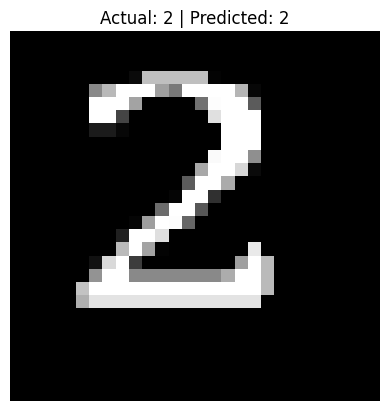

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


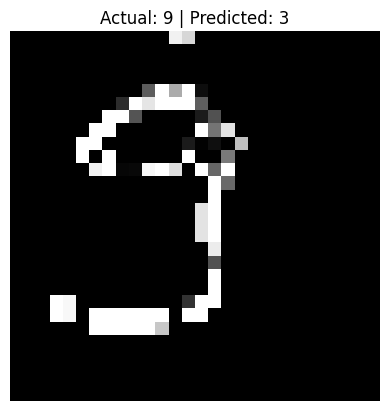

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


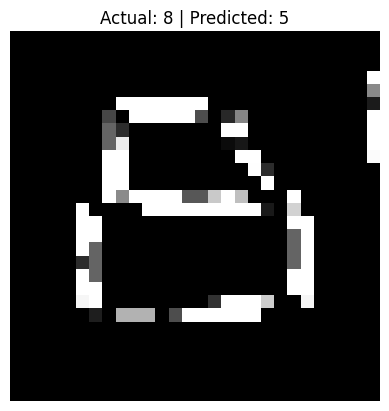

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


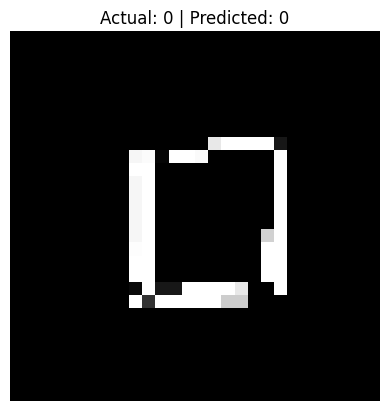

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


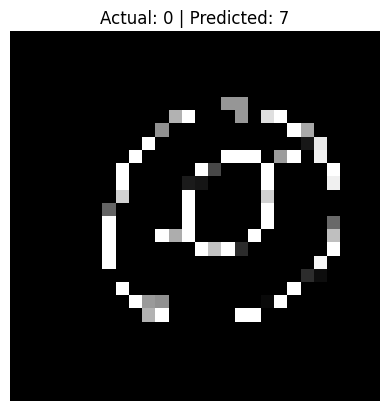

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


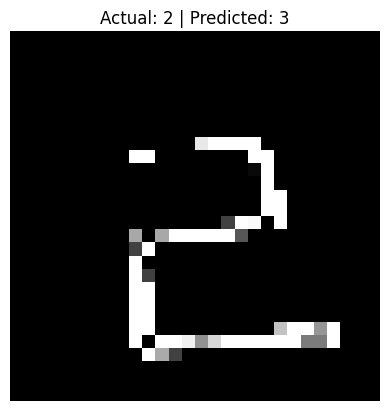

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


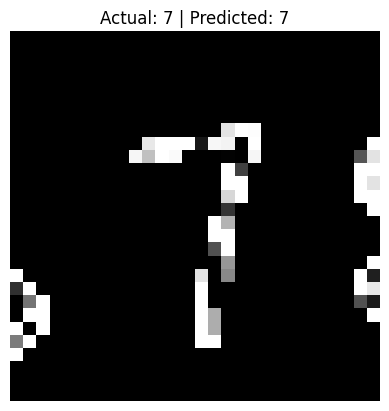

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


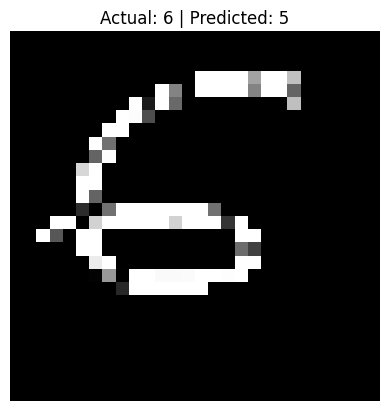

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


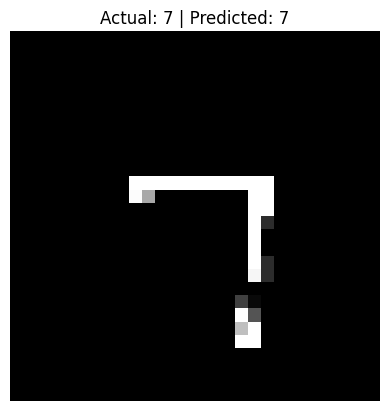

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


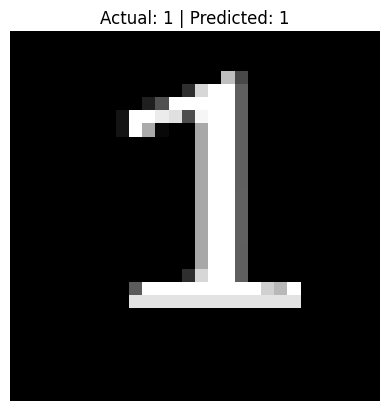

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


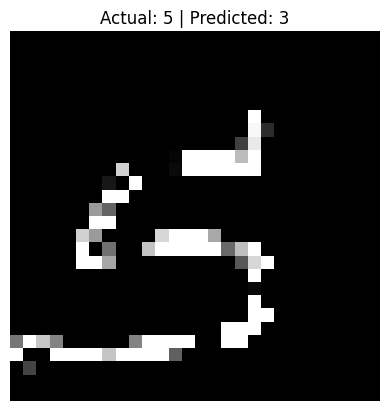

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


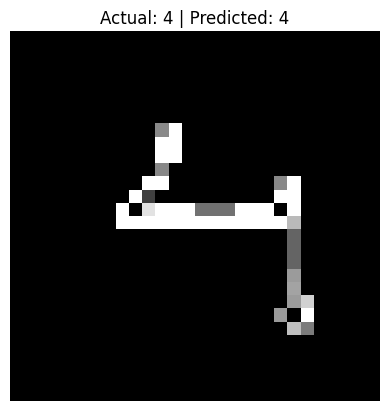

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


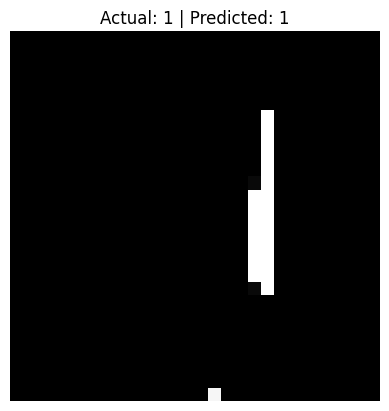

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


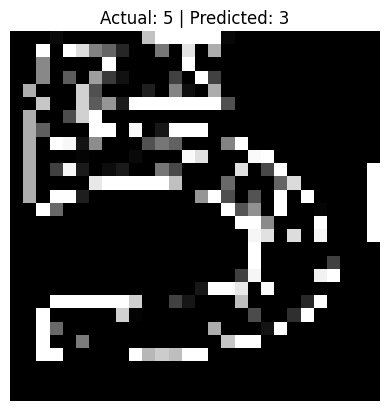

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


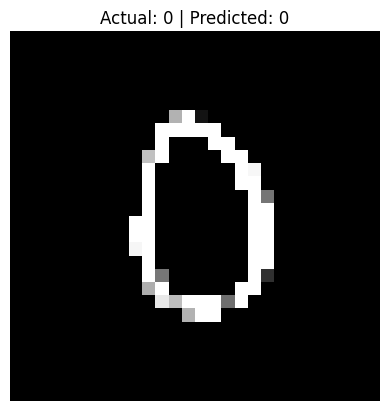

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


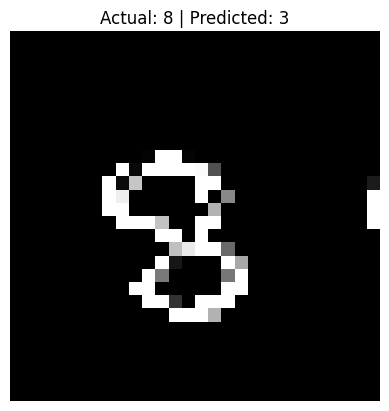

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


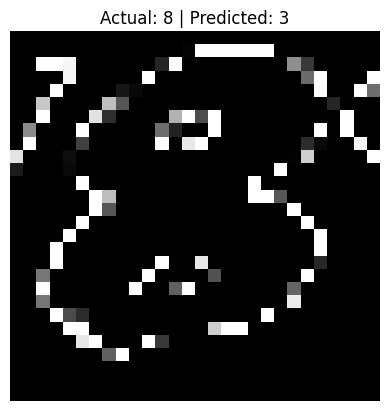

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


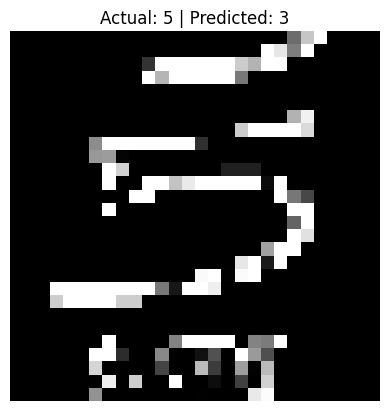

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


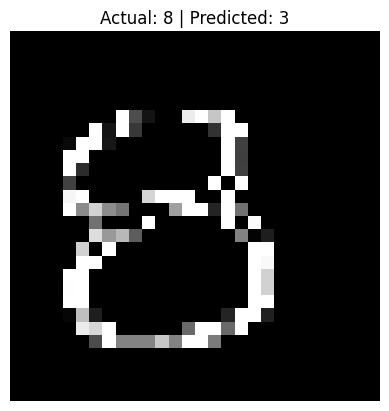

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


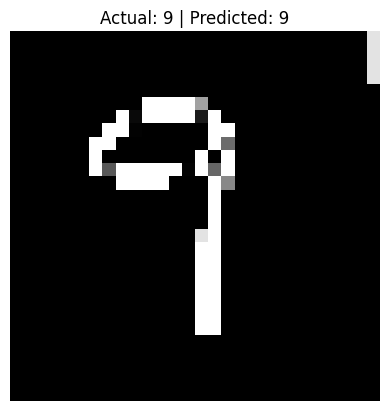

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


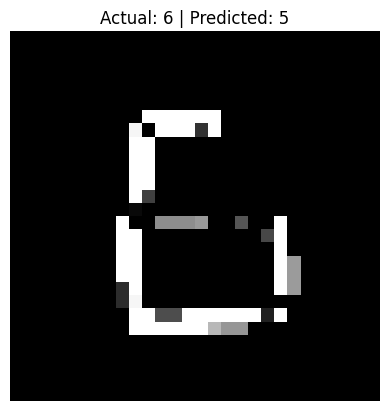

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


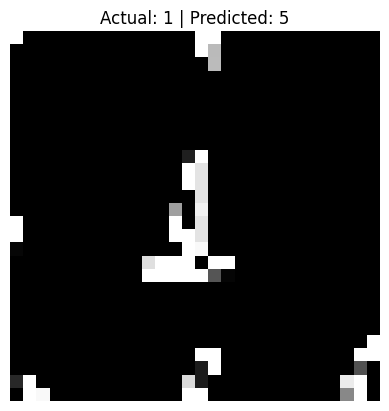

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


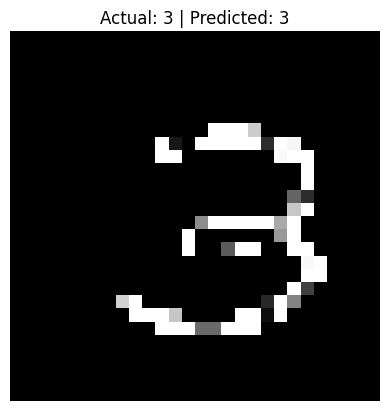

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


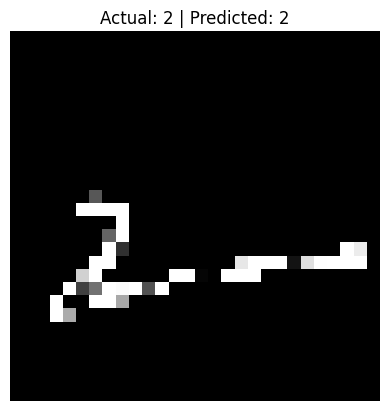

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


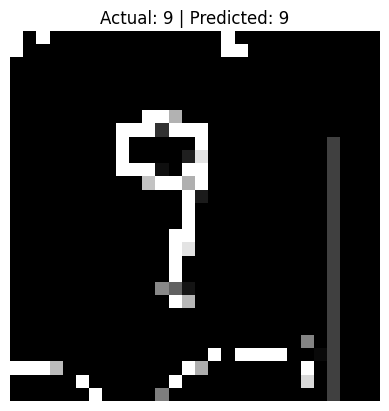

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


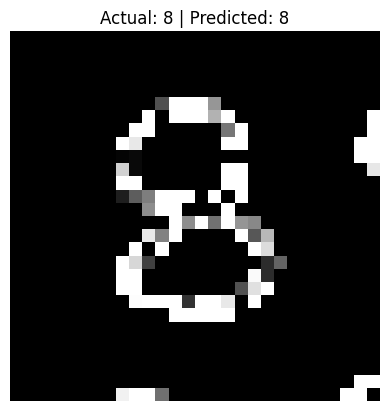

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


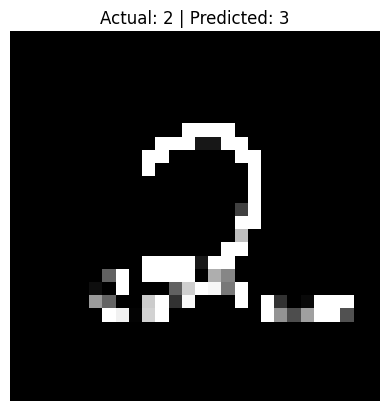

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


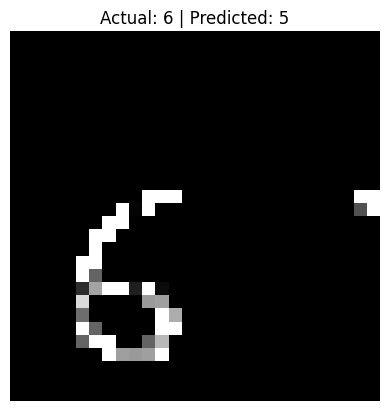

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


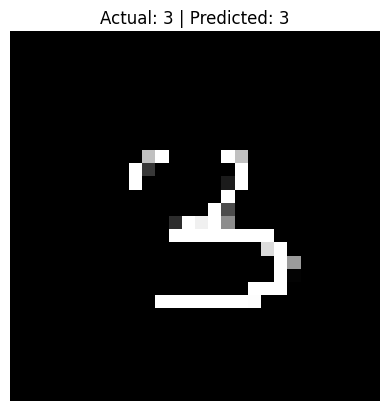

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


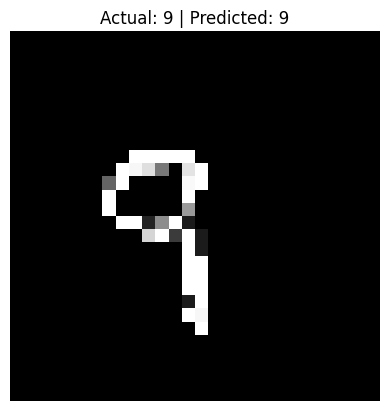

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


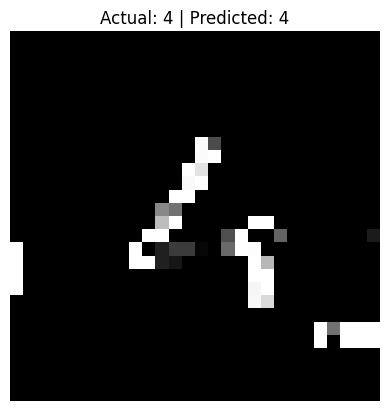

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


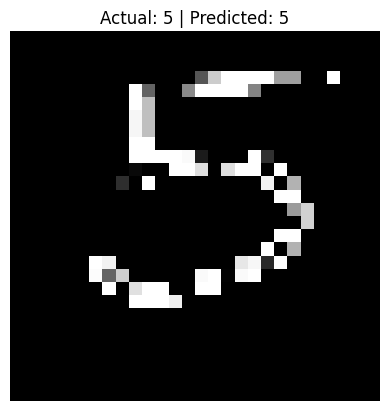

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


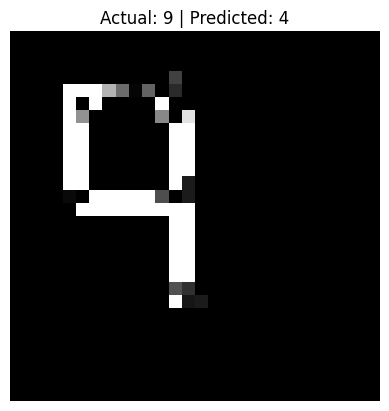

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


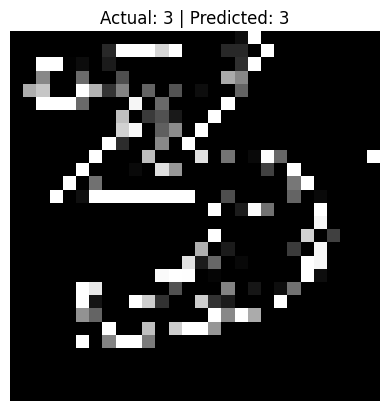

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


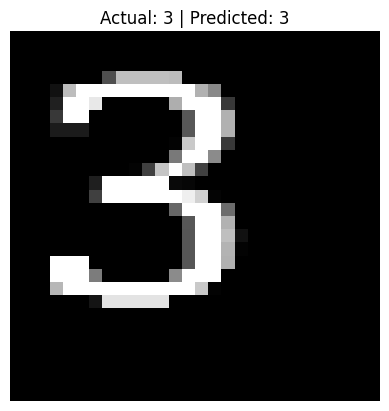

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


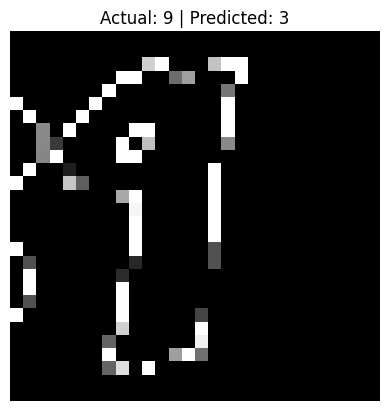


Model Accuracy on Uploaded Images: 58.00%


In [10]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("mnist_cnn_t4_optimized.h5")

# Function to preprocess image
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

# Function to predict images in a folder
def predict_images(folder_path):
    correct = 0
    total = 0

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Extract actual label from filename
        try:
            actual_label = int(img_name.split('.')[0].split(' ')[1][-1])
        except (IndexError, ValueError):
            print(f"Skipping file {img_name} due to invalid filename format.")
            continue

        # Preprocess image
        img = preprocess_image(img_path)

        # Predict using CNN
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)

        # Check if prediction is correct
        if predicted_label == actual_label:
            correct += 1
        total += 1

        # Display image with Actual vs Predicted label
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f'Actual: {actual_label} | Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()

    # Calculate accuracy
    accuracy = (correct / total) * 100
    print(f"\nModel Accuracy on Uploaded Images: {accuracy:.2f}%")

# Call the function to predict images in the extracted folder
predict_images(image_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

<ipython-input-12-4ea1fbf9c2d5>:75: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-4ea1fbf9c2d5>:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


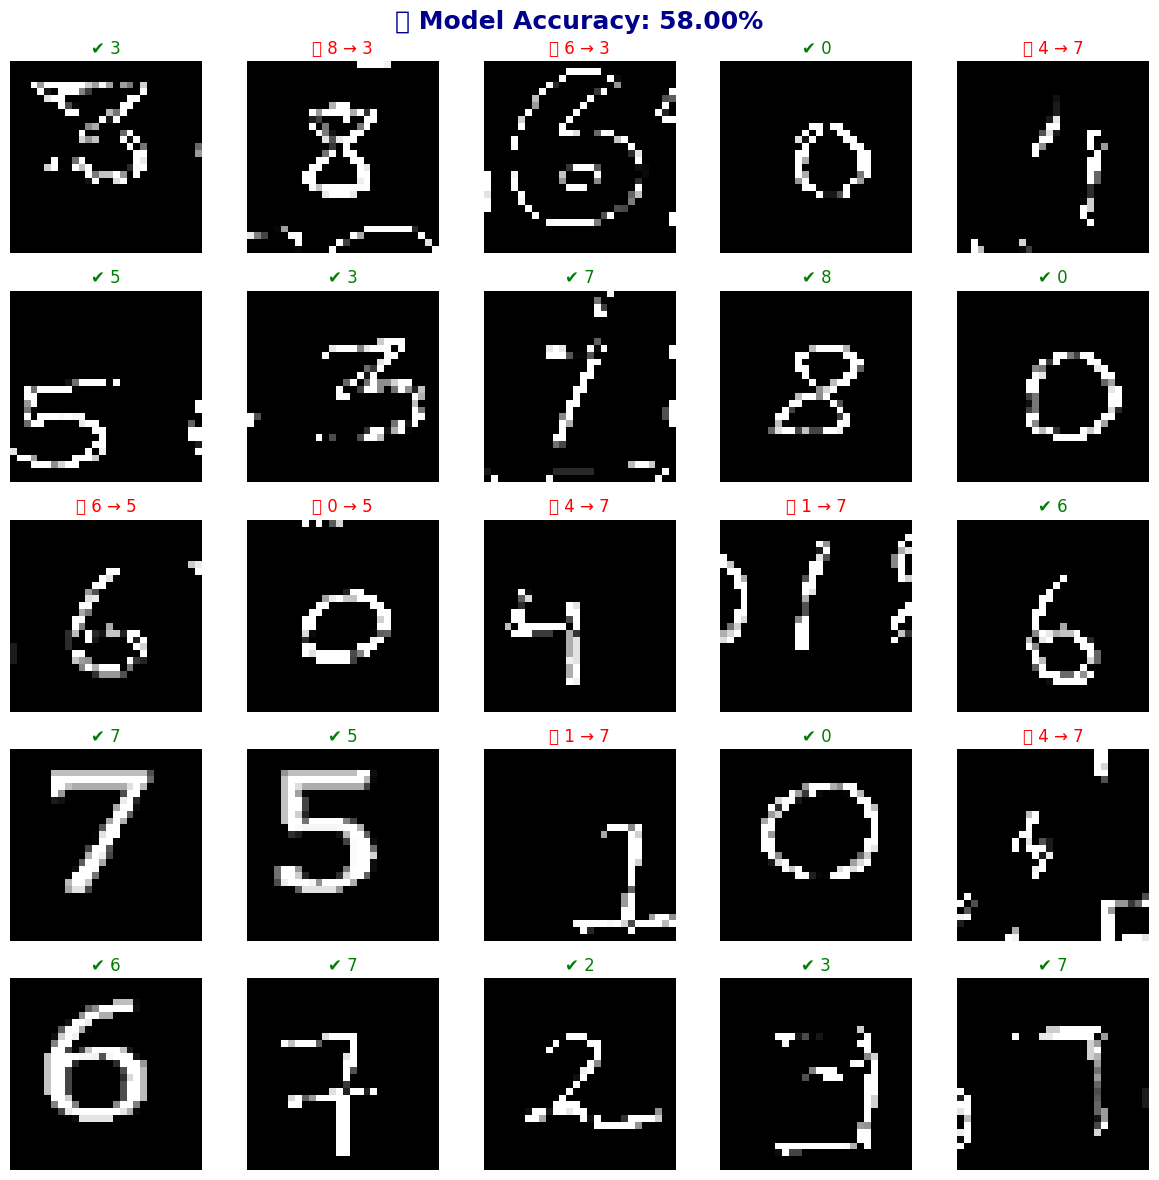

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Function to preprocess images before feeding into CNN
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

    # Adaptive Thresholding for better contrast
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY_INV, 11, 2)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Normalize and reshape for CNN
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    return img

# Function to visualize predictions aesthetically
def visualize_predictions(folder_path, model):
    correct = 0
    total = 0
    actual_labels = []
    predicted_labels = []
    images = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Extract actual label from filename
        try:
            slice_number_str = img_name.split('.')[0].split(' ')[1]
            actual_label = int(slice_number_str[-1])
        except (IndexError, ValueError):
            print(f"Skipping file {img_name} due to invalid filename format.")
            continue

        actual_labels.append(actual_label)

        # Preprocess image
        img = preprocess_image(img_path)

        # Predict using CNN
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)
        predicted_labels.append(predicted_label)

        # Check if prediction is correct
        if predicted_label == actual_label:
            correct += 1
        total += 1

        # Store image & labels for visualization
        images.append((img.reshape(28, 28), actual_label, predicted_label))

    # Calculate accuracy
    accuracy = (correct / total) * 100

    # 📌 Create a 5x5 grid of images
    fig, axes = plt.subplots(5, 5, figsize=(12, 12))
    fig.suptitle(f"📊 Model Accuracy: {accuracy:.2f}%", fontsize=18, fontweight='bold', color='darkblue')

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img, actual, predicted = images[i]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"✔ {actual}" if actual == predicted else f"❌ {actual} → {predicted}",
                         fontsize=12, color='green' if actual == predicted else 'red')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(image_folder, model)